In [106]:
! pip install researchpy



In [1047]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import datetime

## stat imports
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

import researchpy as rp
import scipy.stats as stats
from scipy.stats import skew 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 150)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#reset pd.reset_option('display.float_format')

from numpy import linalg as LA

from IPython.display import clear_output

torch.manual_seed(1)

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Others
import nltk
import string
import re
from collections import Counter
from matplotlib import pyplot

from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import models

from nltk.stem import SnowballStemmer
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.manifold import TSNE

import csv

from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split

#tensorflow
import tensorflow.keras.backend as K
import tensorflow as tf

#critical function spacing print
def v():
  print("\n")
  return None

v()
print("[[IMPORT OK]]")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aryavish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



[[IMPORT OK]]


In [108]:
!pwd
import os

from google.colab import drive
drive.mount('/content/drive') 

/content/drive/My Drive/Capcelona/Deals/Bus Dev/coursera review crap/math review/GMU Dept of Math/pred ana/OR 610 DLNN/hw/proj
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
os.chdir("/content/drive/My Drive/Capcelona/Deals/Bus Dev/coursera review crap/math review/GMU Dept of Math/pred ana/OR 610 DLNN/hw/proj")

In [3]:
#play with twitter data

data = pd.read_csv("dataset/twitterfinal.csv", engine='python', header=None)



data.index
data.head()
list(data)
v()
data.shape

RangeIndex(start=0, stop=1600000, step=1)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


[0, 1, 2, 3, 4, 5]

(1600000, 6)

In [4]:
data.rename(columns={0: 'target',1: 'id', 2: 'date', 3: 'flag', 4: 'user', 5: 'text' }, inplace=True)

# polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

In [5]:
data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
data.isnull().sum() / data.shape[0] ## no nulls

target   0.00000
id       0.00000
date     0.00000
flag     0.00000
user     0.00000
text     0.00000
dtype: float64

In [7]:
# basic EDA on his tweets

data['twlength'] = data.text.apply(lambda x: len(x))

data.date = pd.to_datetime(data['date'])

data['tw_day'] = [d.date() for d in data['date']]
data['tw_time'] = [d.time() for d in data['date']]

/home/aryavish/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning:

tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



In [8]:
data.head()

,target,id,date,flag,user,text,twlength,tw_day,tw_time
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57


In [9]:
data.twlength.describe() #outliers

count   1600000.00000
mean         74.04177
std          36.38800
min           6.00000
25%          44.00000
50%          69.00000
75%         104.00000
max         359.00000
Name: twlength, dtype: float64

In [10]:
cap = 280 # MAX tweet length as of 10/2020

data = data[data.twlength <= cap]



count   1599999.00000
mean         74.04159
std          36.38731
min           6.00000
25%          44.00000
50%          69.00000
75%         104.00000
max         235.00000
Name: twlength, dtype: float64

0.2629637089661638

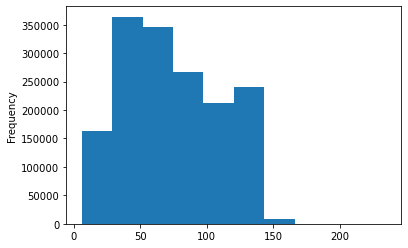

In [11]:
data.twlength.plot.hist()

data.twlength.describe()

v()

skew(data.twlength) #mean tweet length of 75



In [12]:
data.groupby('tw_day').agg(vcount = ('id','count')).describe() #hes tweeting 16x a day?

v()

oldest = min(data.tw_day)
v()
newest = max(data.tw_day)

dateper = (newest - oldest).days

oldest;v() # 1/1/17
newest;v() # 10/2/20
dateper # 1370 days

print("\n mean tweets per day is: ",data.shape[0] / dateper)

,vcount
count,48.00000
mean,33333.31250
std,32945.54055
min,169.00000
25%,8508.25000
50%,19077.00000
75%,43355.00000
max,111676.00000


datetime.date(2009, 4, 6)

datetime.date(2009, 6, 25)

80


 mean tweets per day is:  19999.9875


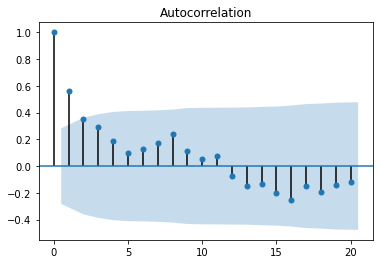

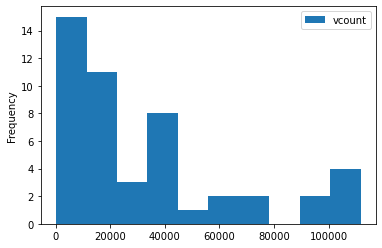

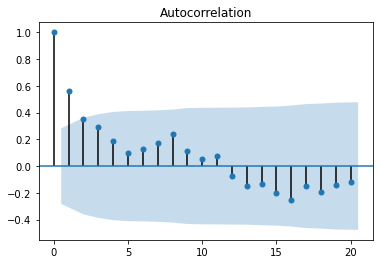

In [13]:
twperday = data.groupby('tw_day').agg(vcount = ('id','count'))

twperday.plot.hist()

plot_acf(twperday.vcount, lags=20) #clear indication of trend and looks like some periodicitity at lag = 7 --> weekly

In [14]:
## explore tweeting times

data.tw_time.describe()
v()
min(data.tw_time)
v()
max(data.tw_time) #he tweets 24 hrs a day

# add hour
data['hour'] = data.tw_time.apply(lambda x: x.hour)

twtime = data.groupby('hour').agg(vc = ('id','count'))


count      1599999
unique       86386
top       07:29:48
freq            66
Name: tw_time, dtype: object

datetime.time(0, 0)

datetime.time(23, 59, 59)

<ipython-input-14-49c72c71dee6>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



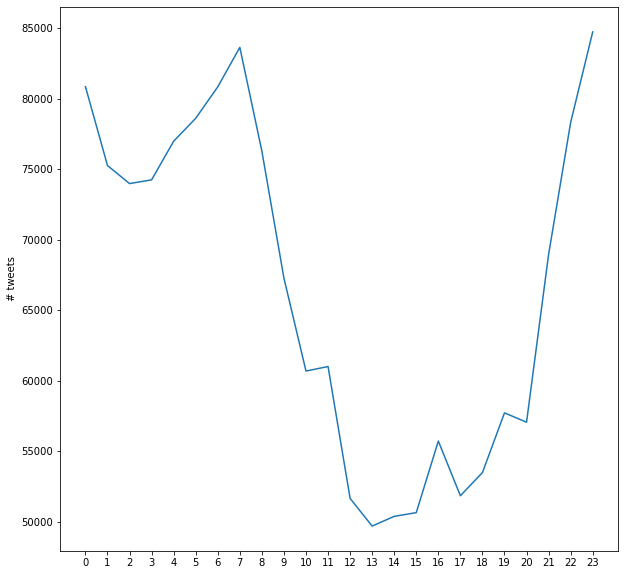

In [15]:
plt.figure(figsize=(10,10))
plt.plot(twtime.index,twtime.vc)
plt.ylabel("# tweets")
plt.xticks(twtime.index)
clear_output() 

#tweet peaks around 12-1pm, significant late night tweeting between 2-3AM and late night 10-11PM
#suspect he's asleep 4-8AM

##meaningless analysis since not normalized for specific time region

array([0, 4])

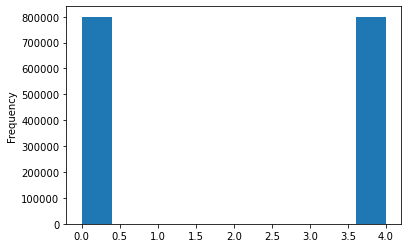

In [16]:
data.target.plot.hist()
v()
data.target.unique() ##this data ONLY contains negative and positive tweets


In [17]:
#unique words eda

stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(data.text)

df_words = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)


In [18]:
df_words.shape #686k unique words

df_words.rename(columns={0: 'vcount'}, inplace=True)



(686634, 1)

In [19]:
df_words.head(10000).describe()

,vcount
count,10000.00000
mean,1028.79710
std,4062.55795
min,78.00000
25%,120.00000
50%,211.00000
75%,546.00000
max,91332.00000


<Figure size 2160x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x7f4060644ca0>,
 <a list of 4 Text major ticklabel objects>)

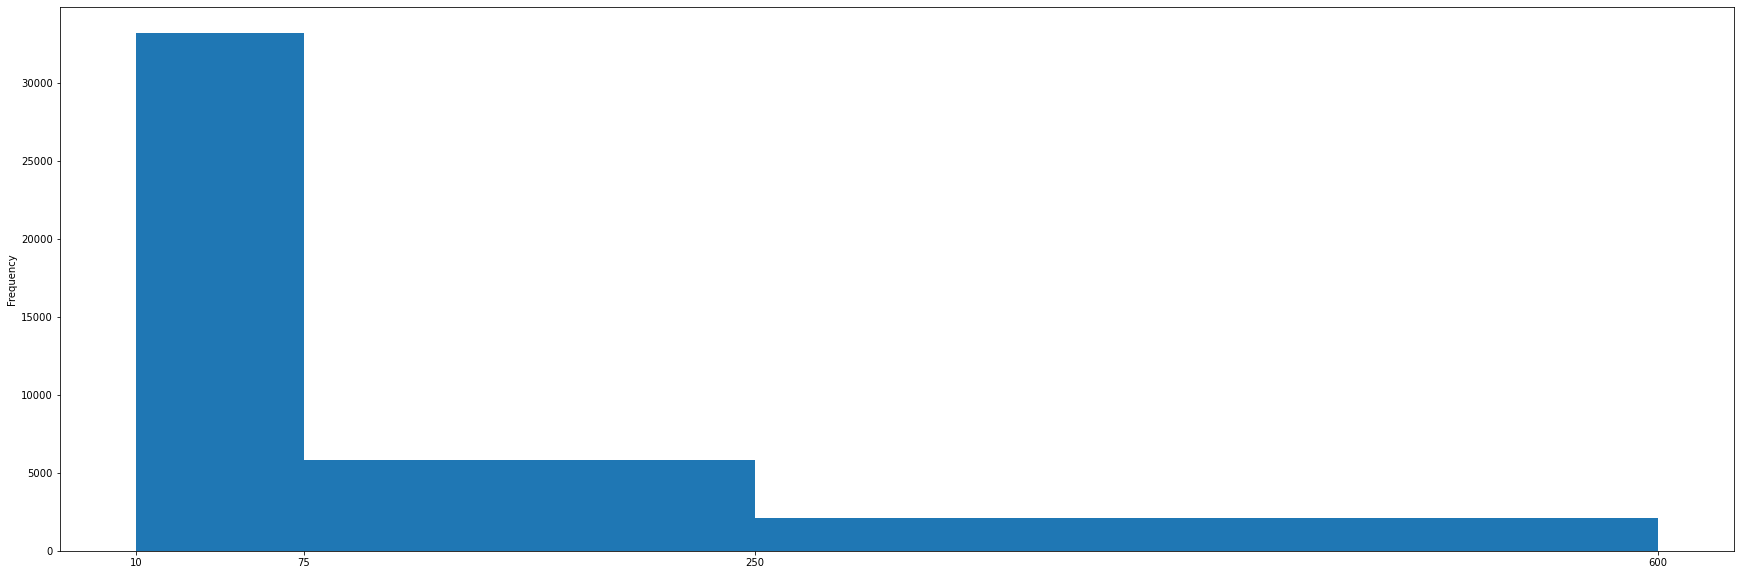

In [20]:
binlist = [10,75,250,600]
binwidth = 100

plt.figure(figsize=[30,10])
df_words.vcount.plot.hist(bins=binlist)
plt.xticks(binlist)

In [21]:
df_words.vcount.describe()

df_words[df_words.vcount == 91332]

count   686634.00000
mean        17.74083
std        505.45857
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max      91332.00000
Name: vcount, dtype: float64

,vcount
good,91332


In [22]:
df_words.head(68000).describe() #90th per centile

,vcount
count,68000.00000
mean,165.83534
std,1598.59065
min,6.00000
25%,8.00000
50%,13.00000
75%,34.00000
max,91332.00000


In [23]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22
...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8


In [238]:
## text preprocessing

## this needs to be augmented after reviewing top word frequences, for ex need to remmove https://, re, and other crap -- review individually analysis to be done in excel

def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"http://", " ", text)
    text = re.sub(r"http", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text
    


In [25]:
data['clean_tweet'] = data.text.apply(lambda x: clean_text(x))

<ipython-input-25-fc12198f2792>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
data['cl_twlength'] = data.clean_tweet.apply(lambda x: len(x))

<ipython-input-26-9387d1370271>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22,switchfoot http : twitpic com 2y1zl awww that ...,88
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22,upset ca not updat facebook text it might cri ...,77
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22,kenichan dive mani time ball manag save 50 res...,53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22,whole bodi feel itchi like fire,31
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22,nationwideclass no behav all i am mad here ca ...,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8,woke up school best feel ever,29
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8,thewdb com cool hear old walt interview ! http...,62
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8,readi mojo makeov ask detail,28
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8,happi 38th birthday boo alll time ! ! ! tupac ...,58


In [28]:
data.reset_index(level=0, inplace=True)

In [29]:
data.drop('index', axis=1, inplace=True)

/home/aryavish/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22,switchfoot http : twitpic com 2y1zl awww that ...,88
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22,upset ca not updat facebook text it might cri ...,77
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22,kenichan dive mani time ball manag save 50 res...,53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22,whole bodi feel itchi like fire,31
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22,nationwideclass no behav all i am mad here ca ...,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8,woke up school best feel ever,29
1599995,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8,thewdb com cool hear old walt interview ! http...,62
1599996,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8,readi mojo makeov ask detail,28
1599997,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8,happi 38th birthday boo alll time ! ! ! tupac ...,58


In [282]:
##downsample to 100k 50/50 split

down_sample = 100000

neg_index = np.random.choice(data[data.target == 0].index, size=int(.5*down_sample), replace=False)
pos_index = np.random.choice(data[data.target == 4].index, size=int(.5*down_sample), replace=False)

red_index = np.concatenate((neg_index, pos_index))

red_data = data.iloc[red_index,:]



In [283]:
red_data.shape

red_data.head()

(100000, 12)

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
587938,0,2216495077,2009-06-17 19:33:34,NO_QUERY,NKOTBsSaugaGirl,@1045CHUMFM calling now for the contest! no on...,62,2009-06-17,19:33:34,19,1045chumfm call contest ! one answer !,38
94280,0,1770999153,2009-05-11 22:52:30,NO_QUERY,iitskayy,bored! dont want skl to be an even day tmrw e...,63,2009-05-11,22:52:30,22,bore ! dont want skl even day tmrw night twittler,49
434365,0,2065169856,2009-06-07 08:02:39,NO_QUERY,jennymcniven,five years ago I went to the TONY'S... tonight...,77,2009-06-07,08:02:39,8,five year ago went toni tonight i am watch couch,48
718027,0,2260180192,2009-06-20 18:48:05,NO_QUERY,NiqueBaybee189,at my grandma's just found out about a friend ...,69,2009-06-20,18:48:05,18,grandma found friend left st ambros ! ! !,41
72367,0,1694210811,2009-05-04 01:34:56,NO_QUERY,youngparmesan,@cimangss Why did it bring you to tears? Awh,45,2009-05-04,01:34:56,1,cimangss bring tear awh,23


In [284]:
red_data.reset_index(level=0, inplace=True)

red_data

,index,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,587938,0,2216495077,2009-06-17 19:33:34,NO_QUERY,NKOTBsSaugaGirl,@1045CHUMFM calling now for the contest! no on...,62,2009-06-17,19:33:34,19,1045chumfm call contest ! one answer !,38
1,94280,0,1770999153,2009-05-11 22:52:30,NO_QUERY,iitskayy,bored! dont want skl to be an even day tmrw e...,63,2009-05-11,22:52:30,22,bore ! dont want skl even day tmrw night twittler,49
2,434365,0,2065169856,2009-06-07 08:02:39,NO_QUERY,jennymcniven,five years ago I went to the TONY'S... tonight...,77,2009-06-07,08:02:39,8,five year ago went toni tonight i am watch couch,48
3,718027,0,2260180192,2009-06-20 18:48:05,NO_QUERY,NiqueBaybee189,at my grandma's just found out about a friend ...,69,2009-06-20,18:48:05,18,grandma found friend left st ambros ! ! !,41
4,72367,0,1694210811,2009-05-04 01:34:56,NO_QUERY,youngparmesan,@cimangss Why did it bring you to tears? Awh,45,2009-05-04,01:34:56,1,cimangss bring tear awh,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1246405,4,1995296671,2009-06-01 13:15:51,NO_QUERY,AlexHale,Just heard Demi Lovato on BBC Radio 1. Just t...,72,2009-06-01,13:15:51,13,heard demi lovato bbc radio thought like know,45
99996,947014,4,1822901171,2009-05-16 20:39:00,NO_QUERY,lkelly56,"@JessicaNTurner Loved Bride Wars, so funny!!!!!",48,2009-05-16,20:39:00,20,jessicanturn love bride war funni ! ! ! ! !,43
99997,1031499,4,1933071896,2009-05-26 22:55:28,NO_QUERY,Oracl,@peon374 Agree totally!!,25,2009-05-26,22:55:28,22,peon374 agre total ! !,22
99998,1321884,4,2014736182,2009-06-03 02:31:01,NO_QUERY,pornobobbie,hey twitter peeps! if you're a big fan of ice...,134,2009-06-03,02:31:01,2,hey twitter peep ! big fan ice cold sweet leaf...,97


In [288]:
red_data.target = red_data.target.apply(lambda x: 1 if x == 4 else 0)


/home/aryavish/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [325]:
red_data

,index,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,587938,0,2216495077,2009-06-17 19:33:34,NO_QUERY,NKOTBsSaugaGirl,@1045CHUMFM calling now for the contest! no on...,62,2009-06-17,19:33:34,19,1045chumfm call contest ! one answer !,38
1,94280,0,1770999153,2009-05-11 22:52:30,NO_QUERY,iitskayy,bored! dont want skl to be an even day tmrw e...,63,2009-05-11,22:52:30,22,bore ! dont want skl even day tmrw night twittler,49
2,434365,0,2065169856,2009-06-07 08:02:39,NO_QUERY,jennymcniven,five years ago I went to the TONY'S... tonight...,77,2009-06-07,08:02:39,8,five year ago went toni tonight i am watch couch,48
3,718027,0,2260180192,2009-06-20 18:48:05,NO_QUERY,NiqueBaybee189,at my grandma's just found out about a friend ...,69,2009-06-20,18:48:05,18,grandma found friend left st ambros ! ! !,41
4,72367,0,1694210811,2009-05-04 01:34:56,NO_QUERY,youngparmesan,@cimangss Why did it bring you to tears? Awh,45,2009-05-04,01:34:56,1,cimangss bring tear awh,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1246405,1,1995296671,2009-06-01 13:15:51,NO_QUERY,AlexHale,Just heard Demi Lovato on BBC Radio 1. Just t...,72,2009-06-01,13:15:51,13,heard demi lovato bbc radio thought like know,45
99996,947014,1,1822901171,2009-05-16 20:39:00,NO_QUERY,lkelly56,"@JessicaNTurner Loved Bride Wars, so funny!!!!!",48,2009-05-16,20:39:00,20,jessicanturn love bride war funni ! ! ! ! !,43
99997,1031499,1,1933071896,2009-05-26 22:55:28,NO_QUERY,Oracl,@peon374 Agree totally!!,25,2009-05-26,22:55:28,22,peon374 agre total ! !,22
99998,1321884,1,2014736182,2009-06-03 02:31:01,NO_QUERY,pornobobbie,hey twitter peeps! if you're a big fan of ice...,134,2009-06-03,02:31:01,2,hey twitter peep ! big fan ice cold sweet leaf...,97


In [326]:
red_data.target

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: target, Length: 100000, dtype: int64

In [231]:
## N-GRAM UNI BI TRI ANAL

#bi-gram
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_bigram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_bigram.rename(columns={0: 'vcount'}, inplace=True)

#tri-gram
co = CountVectorizer(ngram_range=(3,3),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_trigram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_trigram.rename(columns={0: 'vcount'}, inplace=True)

#4-gram
co = CountVectorizer(ngram_range=(4,4),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_4gram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_4gram.rename(columns={0: 'vcount'}, inplace=True)

#5-gram
co = CountVectorizer(ngram_range=(5,5),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_5gram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_5gram.rename(columns={0: 'vcount'}, inplace=True)


In [232]:
df_bigram.shape

bigram_top20 = np.sum(df_bigram.head(20).vcount)

df_bigram

bigram_top20 #total counts in data

(433363, 1)

,vcount
bit ly,823
last night,776
good morn,661
ca wait,621
feel like,589
...,...
grapeseedco hit,1
grapefruit orang,1
grapefruit juic,1
grapefruit confus,1


8013

In [234]:
df_trigram.shape

trigram_top20 = np.sum(df_trigram.head(20).vcount)

trigram_top20

df_trigram

(522134, 1)

1609

,vcount
happi mother day,115
ca wait see,110
day use www,105
get 100 follow,105
follow day use,105
...,...
good check repli,1
good check global,1
good chat tue,1
good chat thank,1


In [235]:
df_4gram.shape

df_4gram_top20 = np.sum(df_4gram.head(20).vcount)

df_4gram_top20

(447003, 1)

1117

In [236]:
df_5gram.shape

df_5gram_top20 = np.sum(df_5gram.head(20).vcount)

df_5gram_top20

(365303, 1)

987

array([[   2, 8013],
       [   3, 1609],
       [   4, 1117],
       [   5,  987]])

<BarContainer object of 4 artists>

Text(0.5, 0, 'N-gram')

([<matplotlib.axis.XTick at 0x7f406a8a39d0>,
 <a list of 4 Text major ticklabel objects>)

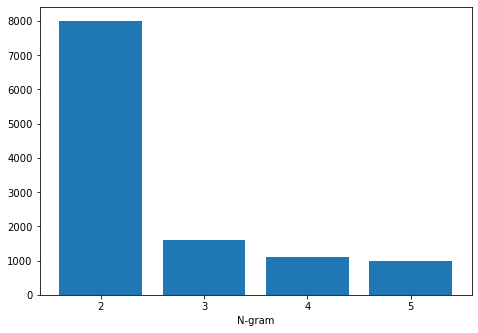

In [237]:
## summary N-gram analysis

ngrams = np.array([(2,bigram_top20),(3,trigram_top20),(4,df_4gram_top20),(5,df_5gram_top20)])

ngrams

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ngrams[:,0],ngrams[:,1])
ax.set_xlabel('N-gram')
plt.xticks(ngrams[:,0])
plt.show()


count   100000.00000
mean        47.69062
std         24.07830
min          0.00000
25%         28.00000
50%         45.00000
75%         66.00000
max        214.00000
Name: cl_twlength, dtype: float64

82.0

90.0

(array([ 14698.,  46995.,  73847.,  92438.,  99342.,  99979.,  99993.,
         99997.,  99998., 100000.]),
 array([  0. ,  21.4,  42.8,  64.2,  85.6, 107. , 128.4, 149.8, 171.2,
        192.6, 214. ]),
 <a list of 1 Patch objects>)

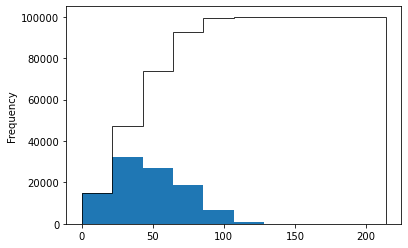

In [166]:
red_data.cl_twlength.describe()

#90th per centile
v()
np.percentile(red_data.cl_twlength,90)
np.percentile(red_data.cl_twlength,95)
#tweet length of 82 90%> in length than other tweets; suggest setting sequence dim to 85,  95% @ 90

red_data.cl_twlength.plot.hist()

plt.hist(red_data.cl_twlength, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')

In [571]:
## tokenize each word in tweet
##INPUT LENGHT HERE

maxtw_length = 90 #95% quantile as confirmed up top
vocabulary_size = 40000

tokenizer = Tokenizer()
tokenizer.fit_on_texts(red_data.clean_tweet)
sequences = tokenizer.texts_to_sequences(red_data.clean_tweet)
tk_data = pad_sequences(sequences, maxlen=maxtw_length)



In [576]:
tk_data # all tweets sequenced using token word indexer and padded to max tweet lngth

np.amax(tk_data)

tk_data.shape

array([[    0,     0,     0, ...,  1437,    21,   569],
       [    0,     0,     0, ...,  1843,    32, 22337],
       [    0,     0,     0, ...,     2,    35,  1368],
       ...,
       [    0,     0,     0, ..., 83785,   480,   257],
       [    0,     0,     0, ..., 83786,   585,  1823],
       [    0,     0,     0, ...,    33,     5,     4]], dtype=int32)

83787

(100000, 90)

In [575]:
label = red_data.target

label.shape

(100000,)

In [577]:
#### SPLIT DATA TEST/TRAIN

testsize = .20

xtrain, xtest, ytrain, ytest = train_test_split(tk_data, label, test_size=testsize, random_state=42)


##pytorch expansion only
ytrain_pyt = np.expand_dims(ytrain, axis=1)
xtrain_pyt = np.concatenate((xtrain, ytrain_pyt), axis=1)

ytest_pyt = np.expand_dims(ytest, axis=1)
xtest_pyt = np.concatenate((xtest, ytest_pyt), axis=1)

In [920]:
np.unique(ytrain)

array([0, 1])

In [562]:
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
import tensorflow.keras.backend as K
import tensorflow as tf


cnnvocab = len(tokenizer.word_index)+1

# Embedding(cnnvocab, length of word vector dimension, twweet length, name) 
#GOOD11111111111111111111111111111111111111111111111

model = Sequential()
model.add(Embedding(cnnvocab, 100, input_length=maxtw_length, name="embedding"))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5, input_shape=(89,)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 90, 100)           8378800   
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 89, 32)            6432      
_________________________________________________________________
global_average_pooling1d_41  (None, 32)                0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 32)                0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_69 (Dense)             (None, 1)               

In [917]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


print(tf.__version__)

xtest_tf.shape


Num GPUs Available:  0
2.3.1


TensorShape([20000, 90])

/home/aryavish/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3349: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



Epoch 1/5
10/10 - 11s - loss: 0.6168 - accuracy: 0.7318 - val_loss: 0.6112 - val_accuracy: 0.7282
Epoch 2/5
10/10 - 8s - loss: 0.5991 - accuracy: 0.7436 - val_loss: 0.5949 - val_accuracy: 0.7323
Epoch 3/5
10/10 - 9s - loss: 0.5804 - accuracy: 0.7507 - val_loss: 0.5782 - val_accuracy: 0.7372
Epoch 4/5
10/10 - 9s - loss: 0.5608 - accuracy: 0.7578 - val_loss: 0.5625 - val_accuracy: 0.7402
Epoch 5/5
10/10 - 10s - loss: 0.5410 - accuracy: 0.7694 - val_loss: 0.5490 - val_accuracy: 0.7427


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

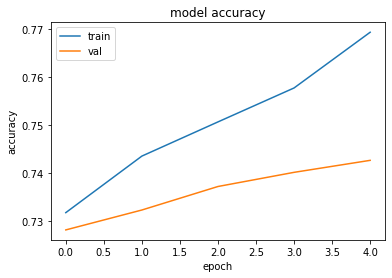

NameError: name 'v' is not defined

In [959]:
cnnvocab = len(tokenizer.word_index)+1

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(xtrain, ytrain, batch_size = 8000, epochs=5, verbose=2, validation_data=(xtest,ytest), shuffle=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


print('Test Accuracy: %f' % (acc*100))

In [960]:
cnnvocab

83788

In [961]:
weights = model.get_layer('embedding').get_weights()[0]
print(weights.shape) 

type(weights)

#np.savetxt("weights_emb_cnn1.csv", weights, delimiter=",")

(83788, 100)


numpy.ndarray

In [599]:
word_count = [tokenizer.word_counts[key] for key in tokenizer.word_counts]

#word_count = word_count.sort(reverse=True)
df_wordc = pd.DataFrame(word_count)
df_wordc.rename(columns={0: 'wc'}, inplace=True)

In [600]:
df_wordc.sort_values(by='wc', ascending=False, inplace=True)


top_words = list(df_wordc.head(50).wc)

In [601]:
top_words = [word for word, count in tokenizer.word_counts.items() if count in top_words]

top_words

['one',
 'want',
 'day',
 'night',
 'i',
 'am',
 'watch',
 'still',
 'back',
 'work',
 'home',
 'lol',
 'see',
 'much',
 'http',
 'com',
 'miss',
 'you',
 'think',
 'need',
 'got',
 'not',
 'get',
 'new',
 'today',
 'go',
 'twitter',
 'time',
 'realli',
 'make',
 'know',
 'morn',
 'hope',
 'ca',
 'feel',
 'come',
 'good',
 'will',
 'me',
 'last',
 'that',
 'would',
 'it',
 'love',
 'well',
 'like',
 'quot',
 'amp',
 'look',
 'thank']

In [602]:
top_words_ind = list(map(tokenizer.word_index.get, top_words))

In [603]:
words = [(top_words_ind[x], top_words[x]) for x in range(len(top_words))]

words

[(21, 'one'),
 (19, 'want'),
 (4, 'day'),
 (32, 'night'),
 (1, 'i'),
 (2, 'am'),
 (35, 'watch'),
 (34, 'still'),
 (20, 'back'),
 (6, 'work'),
 (40, 'home'),
 (15, 'lol'),
 (28, 'see'),
 (45, 'much'),
 (9, 'http'),
 (23, 'com'),
 (17, 'miss'),
 (50, 'you'),
 (26, 'think'),
 (36, 'need'),
 (14, 'got'),
 (16, 'not'),
 (3, 'get'),
 (39, 'new'),
 (12, 'today'),
 (10, 'go'),
 (46, 'twitter'),
 (13, 'time'),
 (27, 'realli'),
 (38, 'make'),
 (22, 'know'),
 (48, 'morn'),
 (33, 'hope'),
 (30, 'ca'),
 (25, 'feel'),
 (43, 'come'),
 (5, 'good'),
 (42, 'will'),
 (47, 'me'),
 (49, 'last'),
 (31, 'that'),
 (41, 'would'),
 (24, 'it'),
 (8, 'love'),
 (37, 'well'),
 (7, 'like'),
 (11, 'quot'),
 (29, 'amp'),
 (44, 'look'),
 (18, 'thank')]

PCA(n_components=2)

(83625, 2)

<Figure size 720x720 with 0 Axes>

Text(-0.0010130061566824679, -0.010557415417918374, "(21, 'one')")

Text(-0.42867915253452016, 1.2764590016384327, "(19, 'want')")

Text(0.12186703830949051, -0.02306891561419227, "(4, 'day')")

Text(-1.7036824490161862, 0.5928775775038746, "(32, 'night')")

Text(0.6900991657275543, 0.043880902843939674, "(1, 'i')")

Text(-0.8588344894910865, -0.15152877451230318, "(2, 'am')")

Text(-1.3718673014196467, 0.6390791175044254, "(35, 'watch')")

Text(-1.5517767255577253, 0.9029464823796997, "(34, 'still')")

Text(1.3825568077557295, 0.6330272278297111, "(20, 'back')")

Text(0.1131544723186044, 1.1327158783097955, "(6, 'work')")

Text(-1.4598698114690154, -1.5803712935936776, "(40, 'home')")

Text(-0.5478330577864504, -0.15280992379254352, "(15, 'lol')")

Text(-2.4643623700908606, 0.28630273745297563, "(28, 'see')")

Text(0.5485463300314911, 0.8819245085277313, "(45, 'much')")

Text(0.8869258485771941, 0.1272145779470303, "(9, 'http')")

Text(0.7024902973968911, -0.8354006387967683, "(23, 'com')")

Text(0.08778001059896597, 0.4850723970932374, "(17, 'miss')")

Text(-0.5559983401997941, 0.07029290607391803, "(50, 'you')")

Text(-0.673704601306424, -0.4365979145093515, "(26, 'think')")

Text(0.3283877905429284, -0.6605921863739151, "(36, 'need')")

Text(0.5730895693846472, 1.424035314965419, "(14, 'got')")

Text(-1.3040955779698562, 1.1709580438682963, "(16, 'not')")

Text(-0.7218854826720269, 0.7810758576723876, "(3, 'get')")

Text(0.37124273606890945, -0.16311033811543657, "(39, 'new')")

Text(-0.7937700809006902, -0.6823049774730408, "(12, 'today')")

Text(-0.517821432939041, 0.8195216381657028, "(10, 'go')")

Text(-0.6365821980135546, -0.06137536831783157, "(46, 'twitter')")

Text(0.9768209795341452, -0.06588282282346006, "(13, 'time')")

Text(0.34788399861180197, 0.385560144431102, "(27, 'realli')")

Text(1.2096692443227062, -1.3621071247829233, "(38, 'make')")

Text(0.9079705078605725, -1.4609101736653696, "(22, 'know')")

Text(1.6161902422747305, -0.07455765819789249, "(48, 'morn')")

Text(0.7060790065541093, -0.5777129086864139, "(33, 'hope')")

Text(0.9619273876739868, 0.5043225057848243, "(30, 'ca')")

Text(-0.6242152983556044, 0.7592051453733406, "(25, 'feel')")

Text(-0.7597505101877002, -0.854539845357861, "(43, 'come')")

Text(2.862554016580934, 1.3904141974334563, "(5, 'good')")

Text(-1.7399643601310368, -1.6919803000456257, "(42, 'will')")

Text(-1.5864595055103259, 1.888709435964973, "(47, 'me')")

Text(-0.15696613363718898, 1.0398985709944493, "(49, 'last')")

Text(-0.12636909810084904, -0.11256876089697543, "(31, 'that')")

Text(0.6629070138243264, 1.5687414762565461, "(41, 'would')")

Text(2.368389133600345, -0.029708755516982342, "(24, 'it')")

Text(-0.3049469836957797, -1.376791750034423, "(8, 'love')")

Text(0.2750717437288111, 0.67199686533781, "(37, 'well')")

Text(-0.8569699559279351, -1.8123150222032547, "(7, 'like')")

Text(0.5676959245350248, -0.3931790840652826, "(11, 'quot')")

Text(0.9374510415216708, 1.3814298654854924, "(29, 'amp')")

Text(-0.24024651705244662, -1.323160817050539, "(44, 'look')")

Text(-0.1279497595441315, -0.5687083636643854, "(18, 'thank')")

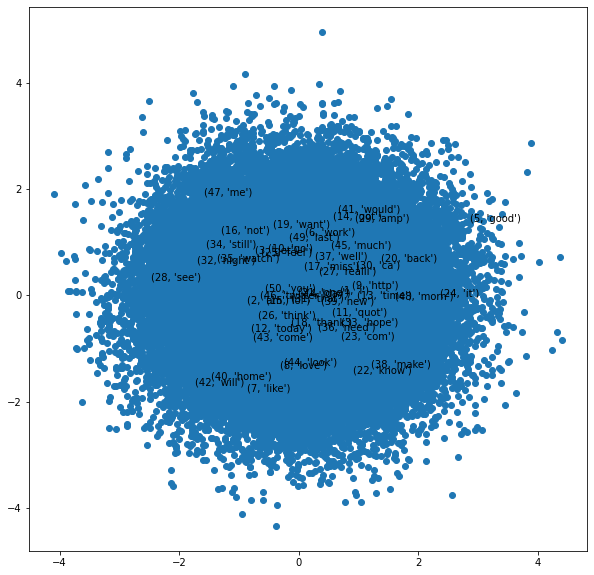

In [604]:


pca = decomposition.PCA(n_components=2)

pca.fit(weights)

X = pca.transform(weights)

X.shape

result = X

pyplot.figure(figsize=(10,10))
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))



pyplot.show()

In [958]:
weights.shape #100 dim per word!!

cnnvocab

max([n for i,n in tokenizer.word_index.items()])

weights[0]

torch.Size([83625, 100])

83788

83787

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [1048]:
## pytorch CNN2D
# ======================

import torch.nn as nn
import torch.nn.functional as F
import torch


# tokenizer.word_index # contains tokenized words
# weights contains embeddings learned from CNN 1D specs above

INPUT_DIM = cnnvocab
EMBEDDING_DIM = 100
N_FILTERS = 32
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = 1
DROPOUT = 0.50
PAD_IDX = 0     #| token to pad to 0 vector, ie word not in vocab

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
                
            #text = [batch size, sent len]

            embedded = self.embedding(text)

            #embedded = [batch size, sent len, emb dim]

            embedded = embedded.unsqueeze(1)

            #embedded = [batch size, 1, sent len, emb dim]

            conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]

            #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]

            pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

            #pooled_n = [batch size, n_filters]

            cat = self.dropout(torch.cat(pooled, dim = 1))

            #cat = [batch size, n_filters * len(filter_sizes)]
            
            return self.fc(cat)
            






In [1049]:
model_pyt = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model_pyt):,} trainable parameters')


The model has 8,407,793 trainable parameters


In [942]:
## WORD2VEC TRAIN ON DATA ALONE

#tokenize clean tweets into list of lists
prep_w2v = [word_tokenize(red_data.clean_tweet[x]) for x in range(red_data.shape[0])]

#vectorize words in clean tweets
wtv_trained = gensim.models.Word2Vec(prep_w2v, size=EMBEDDING_DIM, min_count=5, workers=10)

In [1019]:
## WORD2VEC LOOKUP VECTORS ON PRETRAINED TWITTER DATA OF DIM=100
## RUN AFTER CELL ATOP IF USE GLOVE

## format .txt file NOT BINARY
## !python -m gensim.scripts.glove2word2vec --input  glove.840B.300d.txt --output glove.840B.300d.w2vformat.txt

total_examples = wtv_trained.corpus_count
load_glove_trained = KeyedVectors.load_word2vec_format('dataset/glove.twitter.27B.100d.txt.w2vformat.txt', binary=False)

wtv_trained.build_vocab([list(load_glove_trained.vocab.keys())], update=True)
wtv_trained.intersect_word2vec_format("dataset/glove.twitter.27B.100d.txt.w2vformat.txt", binary=False, lockf=1.0)

wtv_trained.train(prep_w2v, total_examples=total_examples, epochs=wtv_trained.iter)




PCA(n_components=2)

(51, 2)

<Figure size 1440x720 with 0 Axes>

Text(0.25283241252011, -0.41011758808607895, "(21, 'one')")

Text(-1.152190808086071, -3.09523660220981, "(19, 'want')")

Text(-2.01465565097907, 4.430211970584264, "(4, 'day')")

Text(-0.9910162369163155, 0.6508086096205803, "(32, 'night')")

Text(-1.9675309167789934, -0.7762103987576185, "(1, 'i')")

Text(0.23571200091114533, -0.27010314272767333, "(2, 'am')")

Text(-1.251126164345118, 0.23756256348947108, "(35, 'watch')")

Text(0.09008420521593058, -0.5359280813214996, "(34, 'still')")

Text(0.9381621101525914, -0.5225685544361123, "(20, 'back')")

Text(9.215252298418498, -3.8921461026577777, "(6, 'work')")

Text(-1.5949405811477178, 1.696359157226314, "(40, 'home')")

Text(0.6854073945539209, -6.316552760748321, "(15, 'lol')")

Text(-1.1150336708632815, -1.1657939351753173, "(28, 'see')")

Text(-1.6135065057645457, 0.8085607573952831, "(45, 'much')")

Text(-0.4007360004248333, -0.9144979863015334, "(9, 'http')")

Text(0.1885927786461979, 0.19238273222406163, "(23, 'com')")

Text(1.8079910343679249, 1.0483226700228874, "(17, 'miss')")

Text(-1.7556235990555864, -1.26371540449707, "(50, 'you')")

Text(1.404402518727046, 0.6055584386456546, "(26, 'think')")

Text(0.6962349624918872, 1.2558004242232819, "(36, 'need')")

Text(-2.7797131841199088, -0.3809675772206988, "(14, 'got')")

Text(0.011614950276108815, 0.14108726533495033, "(16, 'not')")

Text(0.3906293828436841, 0.9478562456828803, "(3, 'get')")

Text(10.833955469860637, 0.582744736778073, "(39, 'new')")

Text(1.0340270895264896, -0.17443176555519807, "(12, 'today')")

Text(-0.2837366697123561, 0.3714633388439357, "(10, 'go')")

Text(-0.45852558601921384, 0.13796625389877176, "(46, 'twitter')")

Text(0.15501380386185015, -0.014305213297451658, "(13, 'time')")

Text(-1.305831995008686, -0.9173421652957306, "(27, 'realli')")

Text(-3.222162613327711, -7.557269156593687, "(38, 'make')")

Text(-0.07739472961746396, 1.5156097478566375, "(22, 'know')")

Text(1.2538956800205008, 0.27659473900967524, "(48, 'morn')")

Text(-3.9674665453352382, -2.006568092497386, "(33, 'hope')")

Text(-1.8925273608584097, 1.3726505484889766, "(30, 'ca')")

Text(-1.60612649148986, -0.1053077725359324, "(25, 'feel')")

Text(-2.4127748346614526, -4.2509166112328, "(43, 'come')")

Text(0.0934559002974792, 2.028242989610975, "(5, 'good')")

Text(-1.2604151297176494, 0.7588831557750559, "(42, 'will')")

Text(0.03297768723633976, 0.3509923354378779, "(47, 'me')")

Text(0.8389478905170111, -1.0677354636726362, "(49, 'last')")

Text(-2.9191830146587074, -0.7381086698938167, "(31, 'that')")

Text(0.8227499414642204, 4.419159857790139, "(41, 'would')")

Text(-1.8758183227943463, 9.769348893646495, "(24, 'it')")

Text(-0.4794376173497804, 0.9327703060596233, "(8, 'love')")

Text(2.4502054578282726, -0.7353991104052362, "(37, 'well')")

Text(0.7269533040603158, 0.657338876309438, "(7, 'like')")

Text(1.929995318272093, 1.1158719484663484, "(11, 'quot')")

Text(2.364289531759777, 2.0314837934884866, "(29, 'amp')")

Text(-1.5776576397677875, -1.1452857492543453, "(44, 'look')")

Text(0.5008840745923362, -0.8842253889054092, "(18, 'thank')")

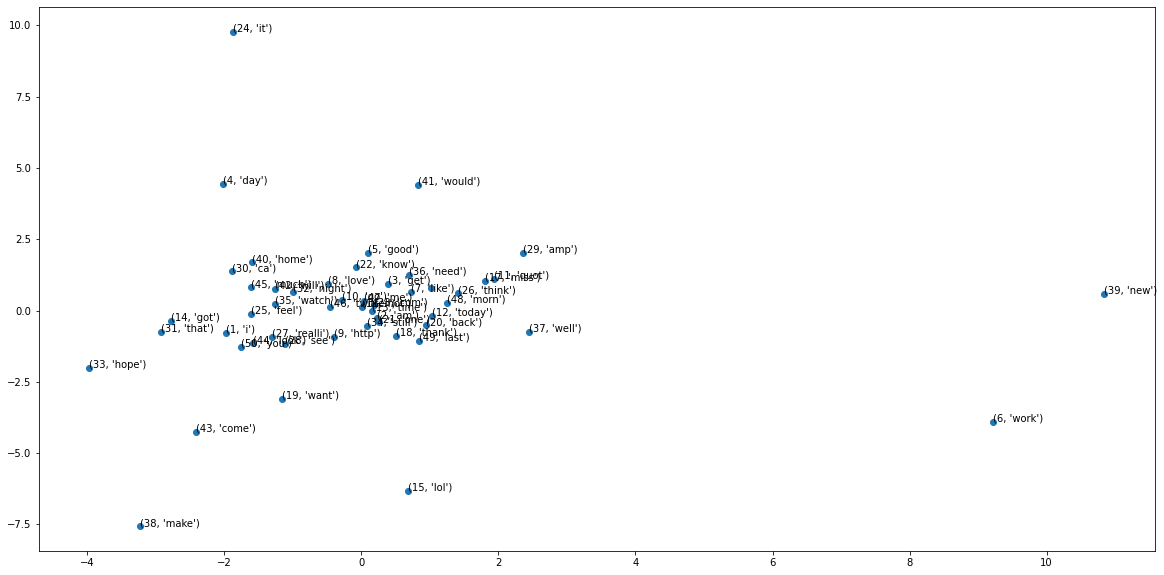

In [1050]:
## PCA FIT GLOVE

wtv_glove_matrix = np.zeros((max(words)[0]+1, EMBEDDING_DIM))

for i, word in words:
    try:
        embedding_vector = wtv_trained.wv.get_vector(word)
    except Exception:
        embedding_vector = None
        pass
    if embedding_vector is not None:
        wtv_glove_matrix[i] = embedding_vector
    if embedding_vector is None:
        print("word not found:",word)



glove_weights = wtv_glove_matrix

# fit a 2d PCA model to the vectors
pca = decomposition.PCA(n_components=2)

pca.fit(glove_weights)

X = pca.transform(glove_weights)

X.shape

result = X

pyplot.figure(figsize=(20,10))
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))



pyplot.show()



In [1052]:
#CREATE WEIGHT EMBEDDINGS FROM WORD2VEC AFTER SEQUENCING DATA FROM TOKENIZER
# TO BE USED AFTER EITHER WORD2VEC STANDALONE OR PRETRAINED ON GLOVE

wtv_embedding_matrix = np.zeros((len(tokenizer.word_index)+1, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = wtv_trained.wv.get_vector(word)
    except Exception:
        embedding_vector = None
        pass
    if embedding_vector is not None:
        wtv_embedding_matrix[i] = embedding_vector
    if embedding_vector is None:
        print("word not found:",word)



word not found: gonna
word not found: wanna
word not found: gotta
word not found: cannot
word not found: extract
word not found: waaaaay
word not found: videoo
word not found: wizbiff
word not found: myslef
word not found: lizuk
word not found: cooold
word not found: vball
word not found: nude
word not found: racer
word not found: moldi
word not found: climat
word not found: vatican
word not found: roma
word not found: ehm
word not found: fruiti
word not found: 1qrf
word not found: cann
word not found: tux
word not found: mole
word not found: pouch
word not found: clove
word not found: okayyy
word not found: pope
word not found: pissi
word not found: bronz
word not found: steer
word not found: tvs
word not found: nectar
word not found: ahaa
word not found: llubyloo
word not found: wooot
word not found: resent
word not found: gentleman
word not found: thatgirl
word not found: isabella
word not found: louder
word not found: conrad
word not found: inconsider
word not found: caption
word n

word not found: reynold
word not found: mentalist
word not found: blare
word not found: istanbul
word not found: fren
word not found: maroon
word not found: dept
word not found: vill
word not found: projector
word not found: itv2
word not found: manda
word not found: paco
word not found: camden
word not found: jimmymarsh617
word not found: squint
word not found: gretel
word not found: dumpster
word not found: scatter
word not found: ax
word not found: ponytail
word not found: superr
word not found: fret
word not found: basil
word not found: aero
word not found: chesterb
word not found: ju
word not found: hhaha
word not found: radha
word not found: chief
word not found: sama
word not found: thrash
word not found: cranberri
word not found: giro
word not found: ramsay
word not found: 999
word not found: hover
word not found: spooki
word not found: cyrandorman
word not found: eon
word not found: harvey
word not found: disregard
word not found: makati
word not found: afl
word not found: arr

word not found: gaaaah
word not found: psst
word not found: kuz
word not found: promenad
word not found: erick
word not found: paristhevixen
word not found: bleak
word not found: shandi
word not found: qualif
word not found: ute
word not found: vn
word not found: sprung
word not found: blockbust
word not found: annettestatus
word not found: solder
word not found: oooooooooh
word not found: rupert
word not found: lactos
word not found: moviess
word not found: sc430girl
word not found: whiplash
word not found: omw
word not found: sympathis
word not found: croc
word not found: rodent
word not found: gabriel
word not found: starri228
word not found: trolli
word not found: omelet
word not found: cforrclemmensen
word not found: 512mb
word not found: sunroof
word not found: mckinley
word not found: sos
word not found: dearpanda
word not found: wasent
word not found: hahahhaha
word not found: helicopt
word not found: parcel
word not found: funnnnn
word not found: swat
word not found: unblock
w

word not found: shopper
word not found: chirpi
word not found: thismayci
word not found: pancit
word not found: aileen2u2
word not found: wote
word not found: matilda
word not found: whoooo
word not found: fresco
word not found: blurb
word not found: flatteri
word not found: miketopia
word not found: kee
word not found: charitytuesday
word not found: cuut
word not found: smoother
word not found: mslaurenlondon
word not found: steamcrow
word not found: somtim
word not found: zelciia
word not found: https
word not found: metropoli
word not found: vene2ia
word not found: anong
word not found: sugarra
word not found: officialftsk
word not found: rawk
word not found: brokencyd
word not found: emarketingguru
word not found: hooo
word not found: isso
word not found: inovera
word not found: 3oh
word not found: metaphor
word not found: wool
word not found: 0princess0
word not found: unsign
word not found: jo9000
word not found: mckmama
word not found: lindascrush
word not found: mikeyway
word n

word not found: blijven
word not found: tomrrow
word not found: 25am
word not found: whiten
word not found: boracay
word not found: shitt
word not found: firesti
word not found: dop
word not found: gotto
word not found: anutha
word not found: mismatch
word not found: shanna
word not found: papyrus
word not found: simmer
word not found: malkin
word not found: trabajo
word not found: faffyp
word not found: cripe
word not found: shriek
word not found: 1998
word not found: showertim
word not found: anniething1
word not found: chrisgarrett
word not found: ibuprofen
word not found: mitten
word not found: saral
word not found: ambigu
word not found: dipper
word not found: oliviaarwa
word not found: bili
word not found: aber
word not found: fallenstar1
word not found: whatta
word not found: twosteppin
word not found: cronkit
word not found: mylivetweet
word not found: 2step
word not found: nver
word not found: divya
word not found: skilletfan01
word not found: leroy
word not found: gabehumbl
w

word not found: britsonpol
word not found: 5ish
word not found: konzert
word not found: jemappellekim
word not found: cnbc
word not found: amazebal
word not found: 1337
word not found: slp
word not found: cena
word not found: watercolor
word not found: coil
word not found: secbarbi
word not found: lucakhouri94
word not found: spirit55
word not found: delect
word not found: iwant
word not found: fifti
word not found: pallet
word not found: wesleycarr
word not found: menus
word not found: fearstrik
word not found: tye
word not found: disqus
word not found: glompbot
word not found: mds0221
word not found: loveemetwotim
word not found: maltes
word not found: cusack
word not found: wouldn
word not found: unitedairlin
word not found: excitedd
word not found: constraint
word not found: dosh
word not found: thingo
word not found: allig
word not found: eoghanquigg
word not found: omin
word not found: tna
word not found: acey
word not found: groovin
word not found: nessapaig
word not found: chec

word not found: myinnersexygirl
word not found: alexsheppard
word not found: luvschweetheart
word not found: gnat
word not found: 3500
word not found: bethie138
word not found: orri
word not found: blogsforbrac
word not found: raveslut
word not found: tweed
word not found: gospel
word not found: hyperopia
word not found: johnathon
word not found: tibet
word not found: zanna85
word not found: sov
word not found: barackobama
word not found: togo
word not found: taho
word not found: dixi
word not found: jamiebow
word not found: gtvone
word not found: graff
word not found: araw
word not found: qot
word not found: havenward
word not found: ummmmmm
word not found: jessicakszohr
word not found: itinerari
word not found: brendon
word not found: alchopop
word not found: vag
word not found: deversum
word not found: rankin
word not found: watkin
word not found: rocks4ev
word not found: luckyglid
word not found: glider
word not found: ishardtoexplain
word not found: igortizz
word not found: jett
w

word not found: katn
word not found: thebrowncoat
word not found: youtube
word not found: boardshort
word not found: lalikat
word not found: buen
word not found: sharlynnx
word not found: lakshmi
word not found: karijob
word not found: biggg
word not found: gilbert
word not found: cautious
word not found: dot12b
word not found: davynathan
word not found: brianconn
word not found: autism
word not found: idolscott
word not found: damansara
word not found: hillywoodshow
word not found: yourgetaway08
word not found: flair
word not found: mattgemmel
word not found: ankur
word not found: niiiiiic
word not found: rile
word not found: tidycat
word not found: hoffman
word not found: pw3rdo
word not found: fuckload
word not found: sya
word not found: tapo
word not found: chloefernandezx
word not found: animoenzo
word not found: dami
word not found: kaloka
word not found: chickieleighc
word not found: rashmid
word not found: germanylovesmcfli
word not found: annett
word not found: yacht
word not 

word not found: josiebennett
word not found: shandreen
word not found: mccoy
word not found: melissawoof
word not found: rhea
word not found: sgtweetup
word not found: habbi
word not found: sandler
word not found: weightless
word not found: induct
word not found: jumbo
word not found: sunnni
word not found: impollyanna
word not found: loveandpeace001
word not found: mariawinth
word not found: oakvill
word not found: i41
word not found: afew
word not found: makemebad35
word not found: proposit
word not found: kelisha
word not found: enya
word not found: vbrown
word not found: markdavidreid
word not found: mikenewton
word not found: kiranchetrycnn
word not found: blogchat
word not found: everon
word not found: erin82883
word not found: okra
word not found: lebanon
word not found: serg
word not found: gumbi
word not found: citygirl912
word not found: fhchris
word not found: officali
word not found: danielledeleasa
word not found: yowza
word not found: pher
word not found: mercedesashley
w

word not found: overallb
word not found: kidsinaustralia
word not found: twiittermum
word not found: eectm
word not found: butchi
word not found: minipauladanc
word not found: timidheathen
word not found: instamom
word not found: chescaaaaaa
word not found: yeaaaahh
word not found: ceg69b
word not found: latitud
word not found: teamkristen
word not found: wasteyyy
word not found: faceyyyi
word not found: yewww
word not found: liverpoolweath
word not found: rucker
word not found: pellev
word not found: gphemsley
word not found: usu
word not found: 000aah
word not found: totatllyy
word not found: nyebelin
word not found: donkeyunltd
word not found: parri
word not found: babillard
word not found: babbilard
word not found: hdf
word not found: brn2jump
word not found: hhume
word not found: studyingg
word not found: waste
word not found: luvinjk4ev
word not found: toumal
word not found: tonimcgeecausey
word not found: muruku
word not found: youtiao
word not found: ltsylvia
word not found: ic

word not found: boredum
word not found: cintothemoon
word not found: mountgrac
word not found: levibeach
word not found: qg83sb
word not found: aliciaintheski
word not found: afmpeetah
word not found: i386
word not found: amd64
word not found: melkoo
word not found: schend
word not found: n5ezi
word not found: drsaith
word not found: rokit
word not found: fupster
word not found: tota
word not found: fergus
word not found: tinygrump
word not found: phoon
word not found: unlmt
word not found: nombradnom
word not found: bouncingsoul77
word not found: musicvideo
word not found: thabillcollecta
word not found: vartika
word not found: 7000vci
word not found: ladley
word not found: seeticket
word not found: caliraya
word not found: heuristicidea
word not found: eeeck
word not found: alreadyyyyyyyy
word not found: marriemartin
word not found: awn
word not found: lexielush
word not found: togetherrrr
word not found: missmoss
word not found: nececito
word not found: abrazo
word not found: aliiii

word not found: heggerz
word not found: yoho22
word not found: 288
word not found: mezzah
word not found: kenken6
word not found: itsaaronpresley
word not found: laurenw95
word not found: bessstfriend
word not found: ramadanov
word not found: eetwiz
word not found: atlzfinez
word not found: timclick
word not found: gracefulgirl
word not found: pegasus
word not found: jonnysmash123
word not found: dolla
word not found: fawksbeaumont
word not found: lypeatt
word not found: realjudgejul
word not found: kos
word not found: lid86
word not found: uri
word not found: xxmar
word not found: auctionrebel
word not found: mwvp8g
word not found: tomozz
word not found: noott
word not found: perspectifi
word not found: brechtj
word not found: krijg
word not found: deze
word not found: wanderin
word not found: curinthia
word not found: dracsor
word not found: vrea
word not found: royalorlean
word not found: morehead
word not found: netmogul
word not found: malasada
word not found: unravel101
word not 

word not found: ambreeeezyy
word not found: trill
word not found: traffuck
word not found: auntiep
word not found: lcrew
word not found: xxsissa
word not found: djschoolboy
word not found: 2mor
word not found: costo
word not found: q8slpg
word not found: wrok
word not found: anhors
word not found: 6uf92
word not found: gargl
word not found: peroxid
word not found: melodydojo
word not found: novato
word not found: nhv09
word not found: flare
word not found: nprlianehansen
word not found: skybar
word not found: evrythng
word not found: b0ut
word not found: acquaint
word not found: kn0ck
word not found: 0ut
word not found: 0mg
word not found: abbyavaryxo
word not found: sveta
word not found: lizett
word not found: islan
word not found: hoperos
word not found: tamzyn
word not found: gmod
word not found: epyon08
word not found: jcayzac
word not found: poken
word not found: leabensen
word not found: bemelici
word not found: stupidream
word not found: square1
word not found: angelaye
word not

word not found: sidneykidney
word not found: tinsel
word not found: superintend
word not found: wuud
word not found: suppris
word not found: buddyluv545
word not found: gabyyy105
word not found: bethbabe4
word not found: rugbyjon
word not found: sharpay
word not found: bitchan
word not found: mrsrummin
word not found: shtoofi
word not found: craptast
word not found: girrrrl
word not found: ritamariposi
word not found: solangenoir
word not found: govperry2010
word not found: latroneb
word not found: xkame
word not found: mellypatti
word not found: rosslarocco
word not found: 16bb8
word not found: ioamegan
word not found: 18000
word not found: kkzpz5
word not found: drewxpatrick
word not found: mouthpiec
word not found: doenya74
word not found: anig3r
word not found: kcl1976
word not found: darav
word not found: hedley
word not found: bellevill
word not found: allieandra
word not found: harriettaa
word not found: confound
word not found: deepsisher
word not found: seremban
word not found

word not found: chrissycastill0
word not found: misterradd
word not found: sirena
word not found: coloronlin
word not found: aagenealog
word not found: rooj4
word not found: jakedevan
word not found: petraaafi
word not found: photoggin
word not found: handin
word not found: p3nman
word not found: kaylavaughn
word not found: schipol
word not found: heeeeeeeeeeeeeeeeeeeeeellllllllllllllllllllllllllllpp
word not found: lisahi
word not found: coorpor
word not found: jiff
word not found: bedrest
word not found: mara
word not found: miel
word not found: cumpl
word not found: kevinwildt
word not found: waterb
word not found: kevupnorth
word not found: dimediva4
word not found: ploeh
word not found: edubs29
word not found: itsmaryy
word not found: aleeksandra118
word not found: lothecongirl
word not found: ericamcgraw
word not found: dorfman
word not found: siwhitehous
word not found: rellciti
word not found: shizukera
word not found: tryign
word not found: beccalovesyou08
word not found: gush

word not found: mroesch
word not found: torey
word not found: rooox3
word not found: bessiemc
word not found: wrongtim
word not found: chopchop
word not found: bannist
word not found: ggbbq
word not found: claireonair
word not found: stonerich
word not found: stuticuti
word not found: coopcak
word not found: highrawfood
word not found: myvitriol
word not found: gracebon
word not found: fellintopiec
word not found: misstatertat
word not found: ohflawless
word not found: mlleem
word not found: yooh
word not found: mmmnadia
word not found: unforch
word not found: woozle2009
word not found: kizzl
word not found: yungc
word not found: ginahey
word not found: nbd
word not found: mister32
word not found: christinaaaaa
word not found: cark
word not found: jayleno
word not found: theoracle2
word not found: deadmemoriesx
word not found: bejewel
word not found: rdornan
word not found: efua
word not found: ainu
word not found: 18s
word not found: monamccheeki
word not found: colan
word not found: 

word not found: dunkim
word not found: minicooper321
word not found: tweetfest
word not found: 2000night
word not found: jeanetl
word not found: youuuuuuu
word not found: jeanet
word not found: unique317
word not found: stouffer
word not found: quinztar
word not found: humphrey
word not found: tessdejong
word not found: maryelleuh
word not found: tomsavill
word not found: traceabl
word not found: 2mz1
word not found: ninacox
word not found: reaali
word not found: roppongi
word not found: wouaaaaah
word not found: overther
word not found: oxfordcityguid
word not found: jungfroid
word not found: starbreaker85
word not found: stickham
word not found: jkennedy4thewin
word not found: mikestok
word not found: wompro
word not found: 11tudf
word not found: oliviabak
word not found: mahdinha
word not found: shelzp
word not found: cakelulu
word not found: xplicitlyr
word not found: maddoxhardcor
word not found: xserv
word not found: demam
word not found: patrickjames66
word not found: jazzshark


word not found: sugarush
word not found: rnfjonasstack
word not found: mtd
word not found: fs
word not found: christopherdx
word not found: partridg
word not found: wcs53
word not found: baaawwww
word not found: girl16
word not found: theana93
word not found: dodol
word not found: thefamouser
word not found: craigend
word not found: tgaband
word not found: zayneeladi
word not found: anthonymason84
word not found: hollyvers
word not found: angg
word not found: desrib
word not found: soundbwoyfast
word not found: ktml
word not found: maverickvil
word not found: milledgevill
word not found: 745am
word not found: batasha
word not found: bedazzl
word not found: aila
word not found: kantian
word not found: ahmadmz3
word not found: 8ish
word not found: burlington
word not found: kibeagl
word not found: slavic
word not found: unicod
word not found: zork
word not found: bokeen
word not found: cheinara
word not found: itscomplicated7
word not found: johnmetbetti
word not found: curat
word not fo

word not found: dirtydizco
word not found: kyleturnsout
word not found: hasslerecord
word not found: annanomali
word not found: convencion
word not found: paulrieckhoff
word not found: klitschko
word not found: millyay
word not found: northam
word not found: alrightey
word not found: furstrat
word not found: urc
word not found: jesspwns09
word not found: travisjr
word not found: erinmorrrissey
word not found: quarterfest
word not found: qf
word not found: iamwaveyk
word not found: hollii
word not found: baaaaaaaaad
word not found: rcsantosbia
word not found: ajperdomo
word not found: wcvf
word not found: 9fm
word not found: fredoniaradio
word not found: grumpz
word not found: jimcobb
word not found: ilearn
word not found: pz4a7
word not found: hnic
word not found: litttl
word not found: ashhleyyyyyi
word not found: tou
word not found: jbras
word not found: nataliagordillo
word not found: bourdain
word not found: frite
word not found: thisisbridget
word not found: lordtiffany27
word not

word not found: denharsh
word not found: supercooltnicki
word not found: darealersttpain
word not found: fuckr
word not found: misswinni
word not found: mallory0905
word not found: mater
word not found: supportive
word not found: cfiercee
word not found: practice
word not found: jusink
word not found: yaaayyya
word not found: strek
word not found: themaguir
word not found: phoena
word not found: kevinou
word not found: bluefloor
word not found: nowwwwwwwwwww
word not found: ashez14
word not found: longgggggggggg
word not found: algat
word not found: veryon
word not found: 10fwi
word not found: 405s
word not found: holliexxxx
word not found: nincompoop
word not found: 7hifn
word not found: drakoboy
word not found: kareneeezi
word not found: leavingg
word not found: bethforsyth
word not found: motherlod
word not found: thoughh
word not found: yomikaa
word not found: shyness
word not found: casperrose7
word not found: icanhasdino
word not found: faget
word not found: spindl
word not found

word not found: zaclevi
word not found: kir
word not found: kawawafac
word not found: elp
word not found: don8
word not found: typ
word not found: 12grh7
word not found: chrisyeh
word not found: jumpcut
word not found: becje
word not found: caramel8
word not found: lmaooooooooooo
word not found: esntial
word not found: tuloy
word not found: projectfus
word not found: p6b0u
word not found: undergrad
word not found: adixoxo
word not found: sumtym
word not found: skinn
word not found: visor
word not found: receed
word not found: u5uo
word not found: aaaaaargh
word not found: bobbyvoicu
word not found: avea
word not found: emisiun
word not found: ceva
word not found: doglost
word not found: nawwwt
word not found: coolval18
word not found: s4sukhdeep
word not found: vh1hoopz
word not found: yonitin1
word not found: sammyjuddmcfli
word not found: pariiii
word not found: puchong
word not found: rawrr
word not found: macgyv
word not found: fejl
word not found: ohhushaubrey
word not found: 7000

word not found: paulinacolada
word not found: shakora
word not found: jetlin
word not found: u4pjr
word not found: teddyris
word not found: computerwizz974
word not found: ericalindsay
word not found: ruchikamehra
word not found: selavi
word not found: schwaaaaaaaaaast
word not found: topofthepark
word not found: wxwbusi
word not found: 0b4
word not found: itsmestaci
word not found: aliabkhay
word not found: princesspixel
word not found: mizzkitteh
word not found: buld
word not found: lildavpot
word not found: darealmrdevin
word not found: aimss123
word not found: dnalysi
word not found: memento
word not found: comciph
word not found: cieslak
word not found: unclear
word not found: goulia
word not found: justyneinde
word not found: 1ygw9
word not found: missvinski
word not found: framolamdu
word not found: vikkiesayah
word not found: worstt
word not found: nurtur
word not found: tenderheartjb
word not found: unmoder
word not found: qa5pw
word not found: carlottap
word not found: instan

word not found: camprock
word not found: missfrankie
word not found: glado
word not found: seanhugh
word not found: davidkyl
word not found: comchek
word not found: zomaian
word not found: saudi
word not found: arabia
word not found: punchout
word not found: watjonaslov
word not found: puddi
word not found: osbourn
word not found: biopic
word not found: sklfkfjldsfjdslfldsfds
word not found: theawsomeaustin
word not found: csproj
word not found: lbt
word not found: streetradio
word not found: worsum
word not found: iha
word not found: naia28
word not found: floppybobshow
word not found: housefli
word not found: pierogi
word not found: brealmerci
word not found: vivo
word not found: estar
word not found: sputnik57
word not found: 3602446242
word not found: trotskii
word not found: crapbag
word not found: matthewcerron
word not found: clobber
word not found: 2row
word not found: aaaaaaaaaaaaaaah
word not found: reachabl
word not found: japanth
word not found: wtfitsroz
word not found: ke

word not found: mattygiardina
word not found: cornhazard
word not found: exersis
word not found: mssgng
word not found: sco
word not found: ansi
word not found: watchingcsi
word not found: msaboveaverag
word not found: watersport
word not found: prepn
word not found: foy
word not found: drwhogurl
word not found: dragynfir
word not found: nsmith729
word not found: seasonnow
word not found: 79p
word not found: alexbananaz
word not found: jodienicholson
word not found: kicki
word not found: bumstick
word not found: fairytaless
word not found: xiannic
word not found: jellybon
word not found: ridiculolus
word not found: 1oim
word not found: tova
word not found: xbale999x
word not found: hugss
word not found: ranifay
word not found: farfal
word not found: rihard
word not found: mayps55
word not found: richturner85
word not found: hotterthanjuli
word not found: wehay
word not found: jah423
word not found: shelbydotjpeg
word not found: sadhasdadjfd
word not found: cryyyyyyyy
word not found: na

word not found: orangefi
word not found: fallenwiccan
word not found: travers
word not found: 5p3zg
word not found: blueberrio
word not found: johnmjess
word not found: takinakab
word not found: cleat
word not found: xshel
word not found: popz
word not found: nolaevol
word not found: birfdayi
word not found: djscore
word not found: erikatica
word not found: wicked12
word not found: sistah
word not found: misskaykay707
word not found: pradt
word not found: justshyann
word not found: nebzyh
word not found: lp99mu
word not found: stima
word not found: liih
word not found: 7j459
word not found: scollard62
word not found: stillgray
word not found: yam
word not found: missjni
word not found: blogflat
word not found: cassiidi
word not found: supthsi
word not found: emilycee09
word not found: oblivion
word not found: lauradim
word not found: moregrit
word not found: kaseysmith
word not found: gordonvandyk
word not found: cigerello
word not found: justanna
word not found: zbreezi
word not found

word not found: raiiiiiin
word not found: 33pm
word not found: homeownership
word not found: luckylowkey
word not found: fooo
word not found: shannooo
word not found: myreturn
word not found: jennyftw
word not found: p33
word not found: jairrrrr
word not found: chatz0rz
word not found: galleysmith
word not found: fsfmerlin
word not found: khyrinthia
word not found: 13s7y7
word not found: tommorrrow
word not found: repatch
word not found: showmesecret
word not found: deandrea
word not found: simp247
word not found: gobshit
word not found: eisner
word not found: someh
word not found: nugg
word not found: mancunianhay
word not found: roknrobyntweet
word not found: loveomglamez
word not found: sciencee
word not found: aleadi
word not found: 3month
word not found: neuralgourmet
word not found: cooperstown
word not found: whitespider1066
word not found: choosen
word not found: catchthisjess
word not found: hitchman
word not found: romanwhit
word not found: rosigolan
word not found: kravitz
w

word not found: lowercas
word not found: btjcz
word not found: ungreen
word not found: stephylouis
word not found: jimhendrie67
word not found: jimm
word not found: tamzinaki
word not found: midtempo
word not found: sulpicia
word not found: ahhhha
word not found: tamwood38
word not found: 124
word not found: wachoviacent
word not found: perenni
word not found: iateyurcookiex3
word not found: cpembleton
word not found: saunderson
word not found: xlr8r
word not found: ugleecrissi
word not found: alleexx1995
word not found: inz11
word not found: mne
word not found: libi
word not found: blueray
word not found: navic
word not found: mluvej
word not found: produktivita
word not found: prace
word not found: siln
word not found: poklesn
word not found: prichodem
word not found: nove
word not found: heloo
word not found: fblink
word not found: alanra
word not found: mehmet
word not found: hatsworth
word not found: rockmanx
word not found: xoarchiemyidol
word not found: zephyrk9
word not found: 

word not found: pauseproof
word not found: stephaniewei
word not found: jameskerrison
word not found: chocolatetwib
word not found: martinbowl
word not found: colinudelewi
word not found: v4000b0
word not found: geobart
word not found: walloon
word not found: avivra
word not found: jessmardon
word not found: 65z8i
word not found: dluek
word not found: ralpharama
word not found: ralphphonelotteri
word not found: 33am
word not found: guesstim
word not found: 92qjam
word not found: hyperbet
word not found: carlitosmum
word not found: fionagmr
word not found: wou
word not found: dunsay
word not found: danniezeitgeist
word not found: thassius
word not found: obrigathank
word not found: oomf
word not found: thenetimp
word not found: addikshun
word not found: eddyshad
word not found: neethood
word not found: peplnw
word not found: cherryblossomsi
word not found: farmstead
word not found: maalouf
word not found: candidcio
word not found: mauritskalff
word not found: 16090
word not found: 350z


word not found: lendesk
word not found: 154
word not found: xtupd
word not found: palina
word not found: hurit
word not found: hadas
word not found: hellbound
word not found: npx5u
word not found: bebs33
word not found: markhein
word not found: kiwimobro
word not found: victoriaquinnxo
word not found: tredstylist
word not found: prive
word not found: jumbafund
word not found: pnnto
word not found: astridbaptist
word not found: wandasanchez
word not found: lipstickdiari
word not found: loovve
word not found: differa
word not found: perkz
word not found: bigggggggggggggggggggg
word not found: slm725
word not found: macgregor
word not found: alvicdom
word not found: jmecg87
word not found: madtapper5678
word not found: dansr
word not found: dustincurti
word not found: nickwichman
word not found: improvyourbiz
word not found: ancir
word not found: pmu0a
word not found: office
word not found: durand
word not found: toxikica
word not found: essyxx
word not found: sato
word not found: 222nd
w

word not found: klcc
word not found: chinoz
word not found: juanzanziro
word not found: hhhhaaaayyyyy
word not found: vern
word not found: troyer
word not found: xspresschic08
word not found: demipapa
word not found: feeloveshotleg
word not found: ibiatcl
word not found: ktzt6e
word not found: superbad24
word not found: shaaaaaaaaaaai
word not found: lebouff
word not found: bigredranggu
word not found: lloydyyyyyyyyyyi
word not found: 15hrs
word not found: 7beebi
word not found: orkooooodd
word not found: skr
word not found: m7l
word not found: lata
word not found: wonkots42
word not found: x3mrspattinson
word not found: yaseminnn
word not found: shelleykeith
word not found: fotojen
word not found: halgriffin
word not found: wilmi
word not found: yuemili
word not found: restylestari
word not found: nyesh
word not found: 1day
word not found: mre
word not found: berta
word not found: dearsnippi
word not found: haigh
word not found: cnbooth
word not found: antscott
word not found: 0900
wo

word not found: chuckthoma
word not found: lovinglayug
word not found: joohymn
word not found: bespectacl
word not found: lordlamington
word not found: absoluteremix
word not found: jbondgirl
word not found: valharri
word not found: paynter
word not found: care2
word not found: cheiferdcypha
word not found: edenriegel
word not found: phoenixvolta
word not found: ahmahgod
word not found: booch
word not found: lukostairov
word not found: lovemacyleigh
word not found: buzznet
word not found: withoit
word not found: madamekyli
word not found: aaronandsanya
word not found: nthin
word not found: angiedoogl
word not found: maxsanna
word not found: kyluhtoot
word not found: squashedpillow
word not found: yaygeorg
word not found: mayawest
word not found: mijo
word not found: foxtel
word not found: ratherbburnin
word not found: brookebeason
word not found: gennygoesrawr
word not found: twittervac
word not found: woahletsgo
word not found: teensi
word not found: sfkelli
word not found: readyyyy
w

word not found: ajmclean
word not found: 648
word not found: eveeer
word not found: tiviti
word not found: daniiroundtre
word not found: stevemekl
word not found: feenin4facetim
word not found: giti
word not found: promm
word not found: northtown
word not found: cousteau
word not found: tdaj
word not found: deadpanl
word not found: mcarvin
word not found: whotook
word not found: danceoflif
word not found: twig
word not found: peejayb
word not found: wager
word not found: m40
word not found: flowerpot
word not found: n6czl4
word not found: aiem1
word not found: xkgrj
word not found: m4rkm
word not found: projectrunway
word not found: fierceeee
word not found: 2xkhbt
word not found: rebshai
word not found: rabbishai
word not found: podomat
word not found: startast
word not found: lilafa
word not found: colinsato
word not found: vivmondo
word not found: shiplikeyou
word not found: newtwitt
word not found: phwoar
word not found: shanza1996
word not found: fuge
word not found: homeschboutiq

word not found: sherinn
word not found: davehul
word not found: tsywq
word not found: hehee
word not found: pastababi
word not found: linkerjpatrick
word not found: tranced1
word not found: ecuaxtacy69
word not found: queenbgwen
word not found: djdragn9
word not found: nakedpizza
word not found: regiment
word not found: ripvo
word not found: pinkhairedgirl
word not found: sum41offici
word not found: megodbik
word not found: hoomme
word not found: lany415
word not found: sarahlazri
word not found: cfl
word not found: 6u29i
word not found: erasmo
word not found: flowwithrho
word not found: pannini
word not found: wift
word not found: stealthsbodygrd
word not found: derekhat
word not found: oval
word not found: fdr
word not found: thatnewnew
word not found: clairehearti
word not found: wyndwitch
word not found: justinehuh
word not found: ced
word not found: blaber
word not found: fabber
word not found: hueheheheheheh
word not found: shinygoldcar
word not found: hahahahahahahhahahahah
word

word not found: e606
word not found: 750
word not found: todayyyyyyyyy
word not found: spoonm
word not found: rightttt
word not found: unexpecteddd
word not found: eileeeeen
word not found: jkk
word not found: mabakl
word not found: heathershea
word not found: kilkenni
word not found: ladydymond
word not found: britanyjean
word not found: menial
word not found: wouldddd
word not found: idfk
word not found: suzyqbee10
word not found: chrisitan
word not found: desifeminista
word not found: taurean
word not found: valentino
word not found: howlingeverett
word not found: 3ds
word not found: glamourkil
word not found: chadfl2la
word not found: joshrosebrook
word not found: parlouron3rd
word not found: garyhil
word not found: scottwild
word not found: automag
word not found: psalmist
word not found: reeadi
word not found: 06dyl
word not found: zainkeebab
word not found: buellamari
word not found: naisenya
word not found: kinggayl
word not found: mediajess
word not found: 6t0t6
word not found

word not found: taper
word not found: chaselisbon
word not found: rappin01
word not found: ct3mki
word not found: gnuchri
word not found: breakki
word not found: avheiv
word not found: chix
word not found: 3i5i8
word not found: 8000tkv
word not found: cofffffee
word not found: 1o8b
word not found: psml
word not found: tiel
word not found: fira
word not found: buzzzzin
word not found: ipow
word not found: ipower921
word not found: rdeni
word not found: mrfantastic119
word not found: nayebroadi
word not found: niceplac
word not found: raeci
word not found: bdcse0
word not found: irwinfelddesign
word not found: katehewlett
word not found: beccalad
word not found: cutemilfactori
word not found: arius
word not found: alialiao
word not found: mummyofmani
word not found: kismusik
word not found: terencechang
word not found: roadrunn
word not found: evenlyn
word not found: tomora
word not found: leysch
word not found: raincitygurl
word not found: gayadesign
word not found: fyc
word not found: 

word not found: kimdasha
word not found: themodernreef
word not found: rae9
word not found: jdayglo
word not found: hadleigh
word not found: robincollin
word not found: skinz
word not found: cyberpenguin
word not found: iman
word not found: prude
word not found: nickolaswheel
word not found: jrotem
word not found: finhish
word not found: tthis
word not found: muhfucka
word not found: inbuild
word not found: theindepend
word not found: mindy6197
word not found: blackvegan
word not found: workpil
word not found: papercutidea
word not found: dena
word not found: guswicktm06
word not found: ktabin
word not found: duuuum
word not found: stevenbolin
word not found: game2
word not found: khalidh
word not found: illuminantceo
word not found: 7sa23
word not found: kelspenc
word not found: shhhooeesss
word not found: grrillaesthet
word not found: perrylim
word not found: singpolyma
word not found: courtmenz
word not found: mada
word not found: labellabytch
word not found: overdosi
word not found

word not found: pzzzzza
word not found: savoy5
word not found: iamabookworm
word not found: shotwel
word not found: justafansit
word not found: hudhsauihdsuiahudihasiu
word not found: jaztwitta
word not found: youlookthesam
word not found: officespacejk
word not found: hartrick
word not found: scroobiuspipyo
word not found: usbornejodi
word not found: cani
word not found: arcticus
word not found: tvone
word not found: seruuu
word not found: philbe
word not found: maitababi
word not found: littlle
word not found: animmma
word not found: insurance
word not found: jamcan
word not found: o7cpg8
word not found: yssfv
word not found: madelinedugganx
word not found: merdujapon
word not found: kail
word not found: pentz
word not found: crhodi
word not found: gyrat
word not found: texaseduc
word not found: nita1207
word not found: 6e5o4
word not found: juliadoherti
word not found: bintyusef
word not found: hollywoodyah
word not found: sergioni
word not found: sjroza
word not found: mhahaha
word

word not found: 513
word not found: 766
word not found: terri5me2000
word not found: chay
word not found: vzk1hv
word not found: stepbro
word not found: jazmyn88
word not found: browniesss
word not found: ed8dcj
word not found: psuedonym
word not found: prid
word not found: yaaahh
word not found: psci
word not found: gourmetyourway
word not found: esfpq
word not found: yaaaaaaaaaaaaaaawn
word not found: gheamoei
word not found: infatu
word not found: schroedinger99
word not found: cymberrain
word not found: realkany
word not found: colinebruyn
word not found: 3l5zm
word not found: goinggggg
word not found: makinusmil
word not found: napper
word not found: hogger
word not found: zalera
word not found: infamousp
word not found: oooooohhhhhh
word not found: alexd
word not found: 4hko5
word not found: negreanu
word not found: kikielis
word not found: theriddlefam
word not found: reail
word not found: jerriegurl
word not found: atch
word not found: spritegirl24
word not found: mkayi
word no

word not found: agencetal
word not found: sebross
word not found: michaelcalien
word not found: neowin
word not found: 66191
word not found: 15minsofmet
word not found: keira
word not found: starturlegaci
word not found: timbaldwin
word not found: kgelert
word not found: m2
word not found: haaaaaaay
word not found: bonito
word not found: demoi
word not found: theevilsunshin
word not found: insanepegasus
word not found: shinjuku
word not found: rosecullenz
word not found: kandychaz
word not found: jamesyfish
word not found: back2real
word not found: lizignth
word not found: 6b82x
word not found: sneex
word not found: favoriteee
word not found: trampoline
word not found: overle
word not found: biffel
word not found: triasputri
word not found: irmaa
word not found: questionnair
word not found: taro
word not found: berapa
word not found: jonox
word not found: woooooow
word not found: 939
word not found: alishaaa
word not found: silverclear
word not found: spwert
word not found: rfiug
word 

word not found: goby8540
word not found: alit
word not found: kswin
word not found: electrax
word not found: mrabercrombi
word not found: 12fgu
word not found: theaaronecstasi
word not found: jennifermf
word not found: melatonin
word not found: dmac1
word not found: omu
word not found: shokudo
word not found: illmaticp
word not found: makemovesmonday
word not found: larryheart
word not found: westinbellevu
word not found: heavenlyb
word not found: kailashhhhh
word not found: twitcouv
word not found: juhidee119
word not found: donhumphrey
word not found: 5tlje4
word not found: fakejenson
word not found: typytypytypi
word not found: csp
word not found: smalltown
word not found: srhnerv
word not found: kimcfli
word not found: ntct3z
word not found: claudiamag
word not found: 5z6n8
word not found: dreamworthi
word not found: ciw
word not found: pinklou81
word not found: nadwcon
word not found: shackletonon
word not found: luciana19
word not found: jjluver756
word not found: 67nij
word not 

word not found: gembob
word not found: amyderbi
word not found: mahvieira
word not found: ulyss
word not found: aliaputri
word not found: broooken
word not found: syima5424
word not found: susa
word not found: minggu
word not found: khami
word not found: gb32x
word not found: thecoryjohn
word not found: wahaaay
word not found: kiev
word not found: beckym1985
word not found: westham999
word not found: dizzyg
word not found: abegail
word not found: randiloveless
word not found: seductivebarbi
word not found: onerov
word not found: amirtalai
word not found: 19fszw
word not found: oohmygoshhh
word not found: iq76o
word not found: muttin
word not found: jessmxo
word not found: lipsynchingscot
word not found: melledesma12
word not found: melaaaa
word not found: goodpecanpi
word not found: ooooooooout
word not found: lizhindley
word not found: cessna
word not found: elliot79
word not found: akathbilski
word not found: robertgirandola
word not found: zoomkid
word not found: shannonali
word not

word not found: tagit
word not found: mimiron
word not found: lizhbaldera
word not found: tammymcmullen
word not found: reyaanaiss
word not found: violinmom
word not found: iamjayyy
word not found: nerdyy
word not found: faithbookjesus
word not found: jetstream
word not found: lyrashin
word not found: littlejohanna
word not found: smst
word not found: kaymania
word not found: lindzml
word not found: 6ggh2
word not found: autobahn
word not found: juniiooor
word not found: theboomtub
word not found: ryangadam
word not found: joce
word not found: victor9098
word not found: nikemsi
word not found: fattysammi
word not found: jstrevino
word not found: coudl
word not found: awaltzforanight
word not found: javathecat
word not found: foreal
word not found: dierwecht
word not found: pension
word not found: djr3z
word not found: melvoln
word not found: gibsonton
word not found: racetrack
word not found: channelsid
word not found: phill600
word not found: uwillbeheard
word not found: 6frav
word no

word not found: searchcast
word not found: al30
word not found: 07am
word not found: kean
word not found: brigadeiro
word not found: dopegirl
word not found: phresh
word not found: janinecasa
word not found: yunaaaa
word not found: booey
word not found: victormenegaux
word not found: vintage83
word not found: muffinlovestom
word not found: hindivis
word not found: bollywoodvis
word not found: subutch
word not found: michaelmknight
word not found: 1000yr
word not found: renemarquez
word not found: hme
word not found: chriskottman
word not found: sweeepi
word not found: letangssexhair
word not found: pec94
word not found: momalomjen
word not found: woollyhol
word not found: heysilli
word not found: hostingsearch
word not found: eclecticradio
word not found: nestoprod
word not found: ryanblock
word not found: g2
word not found: dbarefoot
word not found: kryptonproduct
word not found: nicoledean
word not found: producerdavid
word not found: rodwhit
word not found: lydiett
word not found: r

word not found: ahhz
word not found: loollabelle10
word not found: audiotherapi
word not found: robertsbabydol
word not found: twitterssssss
word not found: happyyyyi
word not found: wiii
word not found: ryanimay
word not found: o62cln
word not found: littlebitki
word not found: 38ghr
word not found: razb2000
word not found: razzmatazz
word not found: pirttyjasmin
word not found: fodwyer
word not found: hypernessss
word not found: ianarnold
word not found: emmmmm
word not found: mediajunki
word not found: rocknwitdblest
word not found: chitownchad1979
word not found: tritri
word not found: pop17
word not found: alfidog
word not found: missjosiemari
word not found: 2zch
word not found: filehost
word not found: offtop
word not found: 6grxm
word not found: marshmellow
word not found: bmg
word not found: funnyhat
word not found: muusiicfreeaak
word not found: zeenat
word not found: clickedapp
word not found: chriscendana
word not found: justinsx
word not found: misst
word not found: justin

word not found: chimerax
word not found: alliecobra
word not found: simpletroubl
word not found: onlyy
word not found: officialitm
word not found: imsoape
word not found: saborkt
word not found: gaabbi
word not found: matthewcolli
word not found: jiyongyong
word not found: straightstreet
word not found: mattspe
word not found: carissagold
word not found: mzdeeva
word not found: mayamichellerew
word not found: fhd86
word not found: 6gbns
word not found: abaigail
word not found: thehouseofmous
word not found: wiiiiiiiiiii
word not found: whitebread
word not found: 6u0bc
word not found: thegreenmanfestiv
word not found: greenpol
word not found: blakemycoski
word not found: mizhelena
word not found: mmwev
word not found: americasmil
word not found: 17550
word not found: chrishumphri
word not found: pryor
word not found: capthazard
word not found: 5f6z3
word not found: sarahstahl
word not found: bhzb1
word not found: nanisnap
word not found: mandyjdunn
word not found: jonray
word not found:

word not found: qqdhb3
word not found: yeeh
word not found: monicagatmaitan
word not found: renzo
word not found: alisondicken
word not found: cheeer
word not found: jdg333
word not found: michellecotti
word not found: 89407
word not found: zwinkynewstim
word not found: kaidenblak
word not found: tobymikl
word not found: milwauk
word not found: maume
word not found: mrsaint
word not found: gelagelagela
word not found: miscellani
word not found: sidekick28
word not found: haboob
word not found: christinemariej
word not found: ssingh9
word not found: patpreezi
word not found: nileyxlov
word not found: 5t86q8
word not found: albanoalfredo
word not found: teve
word not found: caseyspoon
word not found: kailakuuipo
word not found: jackiola
word not found: continutaion
word not found: xarizonajayx
word not found: coasterin
word not found: ile
word not found: wentworthmil
word not found: ashleycmeverett
word not found: adamwatkins1
word not found: 6qxa8
word not found: twitpicc
word not found

word not found: tacojel
word not found: bax
word not found: lettieandmik
word not found: aceo
word not found: alexlewi
word not found: thedeanorama
word not found: supri
word not found: laborracha
word not found: bazilizk
word not found: dirtier
word not found: nicefellow31
word not found: hendrick
word not found: conster
word not found: squaschoom
word not found: yozuuuuuuu
word not found: cupcakelos
word not found: website
word not found: mle
word not found: refineri
word not found: dubaiwrit
word not found: tedo
word not found: kmx9000
word not found: alexlindsay
word not found: lvdjgarcia
word not found: twim
word not found: therealdvorak
word not found: ayseegiirlxx
word not found: skeinsta
word not found: 780
word not found: jorgeepow
word not found: jahfyah
word not found: captainoden
word not found: jalbumfrog
word not found: jalbum
word not found: boutt
word not found: 2wvt
word not found: lykeio
word not found: undertakingbar
word not found: 1a8asn
word not found: palmyra
wor

word not found: strudel
word not found: sweeep
word not found: reiter
word not found: angelofmusic172
word not found: sharin
word not found: transitionsport
word not found: streetratpoon
word not found: sedari
word not found: muaah
word not found: redrosepet
word not found: rahul
word not found: cpkiii
word not found: itskany
word not found: mwhaaa
word not found: cu54rw
word not found: stefanomaggi
word not found: frolic
word not found: sextap
word not found: meilleur
word not found: michaeltorbert
word not found: dougwaltman
word not found: rosemcflyxdanni
word not found: meerajan
word not found: utada
word not found: 16xtnc
word not found: marcozeh
word not found: 2ice
word not found: kingsburi
word not found: marabg
word not found: theadamgregori
word not found: 670ri
word not found: giblahoj
word not found: fickleknitt
word not found: kaleycuoco
word not found: huni
word not found: raziel714
word not found: munday
word not found: 21mo
word not found: 4yo
word not found: geekerella

word not found: shakah0l
word not found: stefi
word not found: tevin
word not found: jeremypihl
word not found: liberty100
word not found: ludwikc
word not found: queenzita
word not found: officialtfk
word not found: 66zlh
word not found: graywolfpress
word not found: iradish
word not found: hawaiianlif
word not found: pukmi
word not found: paullyoung
word not found: errandsvill
word not found: feather1228
word not found: moburns67
word not found: katttttt
word not found: r7xlv
word not found: joysexichick
word not found: justinedevin
word not found: froactiv
word not found: cosignag
word not found: tnys5
word not found: 6ea41
word not found: sweeeeeeeeeet
word not found: sarahjanderson
word not found: evzi
word not found: mskenyada
word not found: mischka
word not found: jaynedampf
word not found: bentleybeav
word not found: thecutepuppy21
word not found: chloweeee
word not found: veevvi
word not found: fridaynightboy
word not found: melissaindot
word not found: niaa
word not found: t

In [1042]:
wtv_embedding_matrix[100] # TEST

array([ 2.75975376e-01, -1.55292183e-01,  6.81098342e-01, -1.25868833e+00,
        1.69630539e+00,  1.33927834e+00,  8.87292922e-01, -7.31331110e-02,
        8.47225308e-01,  9.30703463e-05, -4.76668328e-01, -2.48091351e-02,
       -8.15697670e-01,  2.09907818e+00, -3.28942120e-01, -7.46518254e-01,
       -4.42334741e-01,  1.38318872e+00, -9.31464970e-01,  9.24609423e-01,
        2.91123509e-01, -4.24152285e-01, -1.29011512e+00, -1.21846664e+00,
        1.43465197e+00,  1.17564833e+00, -9.44267571e-01, -3.59014422e-01,
        3.39610279e-01, -8.71350586e-01, -2.11982155e+00,  1.04746275e-01,
       -4.14649457e-01, -1.31215215e-01,  2.26778221e+00,  1.75272271e-01,
       -7.64151335e-01,  4.64017779e-01,  5.53837180e-01,  2.92770505e-01,
       -2.46532917e+00,  1.34889865e+00,  8.45097065e-01, -9.55272913e-02,
        4.96850997e-01, -1.19540286e+00, -3.03016514e-01,  2.44981870e-01,
       -1.35335982e-01,  2.52048522e-01,  9.99096483e-02, -1.19367111e+00,
        1.19740927e+00, -

In [972]:
### PRETRAINED EMBEDDING VECTORS USING [[CNN1D]], DO NOT USE IF TRAIN PARAMS SEPARATELY !!!

pretrained_embeddings =  torch.from_numpy(weights)

model_pyt.embedding.weight.data.copy_(pretrained_embeddings) 

model_pyt.embedding.weight.data[0] = torch.zeros(EMBEDDING_DIM) ## set 0 vector to not found word

model_pyt.embedding.requires_grad = False

model_pyt.embedding.requires_grad

tensor([[ 0.0325,  0.0126,  0.0074,  ...,  0.0221,  0.0371, -0.0089],
        [-0.0356,  0.0500, -0.0235,  ...,  0.0257, -0.0223,  0.0005],
        [-0.0911,  0.0056,  0.0088,  ...,  0.0308, -0.0242, -0.0859],
        ...,
        [-0.0127,  0.0441,  0.0549,  ..., -0.0369, -0.0275,  0.0337],
        [ 0.0034,  0.0147, -0.0116,  ...,  0.0355, -0.0040,  0.0139],
        [ 0.0226, -0.0430,  0.0190,  ...,  0.0405, -0.0106,  0.0453]])

False

In [1053]:
### PRETRAINED EMBEDDING VECTORS USING [[WORD2VEC]], DO NOT USE IF TRAIN PARAMS SEPARATELY !!!

pretrained_embeddings = torch.from_numpy(wtv_embedding_matrix)

model_pyt.embedding.weight.data.copy_(pretrained_embeddings) 

model_pyt.embedding.weight.data[0] = torch.zeros(EMBEDDING_DIM) ## set 0 vector to not found word

model_pyt.embedding.requires_grad = False

model_pyt.embedding.requires_grad


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.7095,  0.2601,  0.0813,  ..., -0.9958, -0.1971,  0.8395],
        [-0.9369,  0.5589, -1.5224,  ...,  0.1065,  2.2086, -2.3556],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

False

In [1054]:
batch_size = 4000

train_loader = torch.utils.data.DataLoader(dataset=xtrain_pyt, 
                                           batch_size=batch_size, 
                                           shuffle=False)


test_loader = torch.utils.data.DataLoader(dataset=xtest_pyt, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#loads as tensors

In [754]:
import torch.optim as optim

optimizer = optim.Adam(model_pyt.parameters())

criterion = nn.BCEWithLogitsLoss()

optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'params': [0, 1, 2, 3, 4, 5, 6, 7, 8]}]}

In [1055]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

def conf_matrix(label_pred, threshold=.50):

    # uses sigmoid activation
    
    v1 = np.array(label_pred)
    tlabel = [v1[x,0].item() for x in range(v1.shape[0])]
    tsig = [torch.sigmoid(v1[x,1]).detach().numpy().item() for x in range(v1.shape[0])]
    tsig = [1 if tsig[x] >= threshold else 0 for x in range(len(tsig))]
    
    labels = np.unique(tlabel)

    a =  metrics.confusion_matrix(tlabel, tsig, labels=labels)

    print("\n Confusion matrix \n")
    print("\n ",pd.DataFrame(a, index=labels, columns=labels))
    #ACTUAL ROWS, PRED COLS
    print("\n actual are rows, predicted are cols")
    return None

In [911]:
global_weights = []


In [1056]:
maxlen = xtrain_pyt.shape[1]

def train_epoch(model, optimizer, maxgrad, batchsize=8000):
    loss_log, acc_log, grad_log, tgrad_log = [], [], [], []
    model.train()
    for batch_num, batch in enumerate(train_loader):
        
        data = batch[:,0:maxlen-1]
        target = batch[:,maxlen-1]
        target = target.float()

        optimizer.zero_grad()
        output = model(data).squeeze(1)
        
        acc = binary_accuracy(output, target)
        acc_log.append(acc)
        
        loss = criterion(output, target)
        
        loss.backward()
        
        tgrad_log.extend(torch.reshape(model.convs[0].weight.grad.clone(), (1,N_FILTERS*1*FILTER_SIZES[0]*EMBEDDING_DIM)).detach().numpy())
        tgrad_log.extend(torch.reshape(model.convs[1].weight.grad.clone(), (1,N_FILTERS*1*FILTER_SIZES[1]*EMBEDDING_DIM)).detach().numpy())
        tgrad_log.extend(torch.reshape(model.convs[2].weight.grad.clone(), (1,N_FILTERS*1*FILTER_SIZES[2]*EMBEDDING_DIM)).detach().numpy())
        # get gradient dl/dw of weight params in each N-gram layer
        grad_log.append((batch_num+maxgrad, tgrad_log))
        tgrad_log = []
        
        optimizer.step()
        
        loss = loss.item()
        loss_log.append(loss)
        
    return loss_log, acc_log, grad_log    

def test(model):
    loss_log, acc_log, pred_log, label_log = [], [], [], []
    
    model.eval()
    for batch_num, batch in enumerate(test_loader):    
        
        data = batch[:,0:maxlen-1]
        target = batch[:,maxlen-1]
        target = target.float()
        
        output = model(data).squeeze(1)
        loss = criterion(output, target)

        label_log.extend(target)
        pred_log.extend(output)
        
        acc = binary_accuracy(output, target)
        acc_log.append(acc)
                
        loss = loss.item()
        loss_log.append(loss)
    
    label_pred = list(zip(label_log,pred_log))
    return loss_log, acc_log, label_pred

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()


def plot_gradient(grad_log):
    gsteps = [grad_log[x][0] for x in range(len(grad_log))]
    gnorms = []
    gcomp = []

    for y in range(len(grad_log)):
        for x in range(len(grad_log[y][1])):
            gcomp.extend(grad_log[y][1][x])
        gcomp = np.array(gcomp)
        gnorms.append(np.linalg.norm(gcomp))
        gcomp = []

    plt.figure(figsize=(10,10))
    plt.plot(gsteps,gnorms)
    plt.xlabel("train steps")
    plt.ylabel("gradient magnitude")
    plt.show()
    
    return None

    
def train(model, opt, n_epochs):
    train_log, train_acc_log, label_pred, grad_log = [], [], [], []
    val_log, val_acc_log, grad_train = [], [], []


    max_grad=0
    for epoch in range(n_epochs):
        print("Epoch {0} of {1}".format(epoch, n_epochs))
        train_loss, train_acc, grad_train = train_epoch(model, opt, max_grad, batchsize=batch_size)
    
        val_loss, val_acc, label_pred = test(model)

        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)
        
        max_grad = max([grad_train[y][0] for y in range(len(grad_train))])+1
        
        grad_log.extend(grad_train)

        steps = xtrain_pyt.shape[0] / batch_size
                       
        #assert False, "VISH-breakpoint"
        val_log.append((steps * (epoch + 1), np.mean(val_loss)))
        val_acc_log.append((steps * (epoch + 1), np.mean(val_acc)))
        
             
        clear_output()
        plot_history(train_log, val_log)    
        plot_history(train_acc_log, val_acc_log, title='accuracy')   
        
        if epoch == n_epochs - 1:
            plot_gradient(grad_log)
            conf_matrix(label_pred)
            
            global global_weights
        
            global_weights = grad_log
            
            
        print("Epoch: {2}, val loss: {0}, val accuracy: {1}".format(np.mean(val_loss), np.mean(val_acc), epoch))




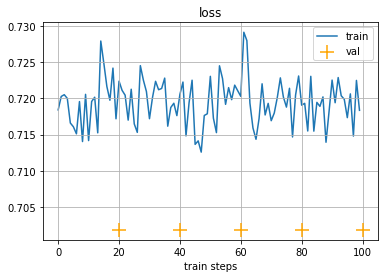

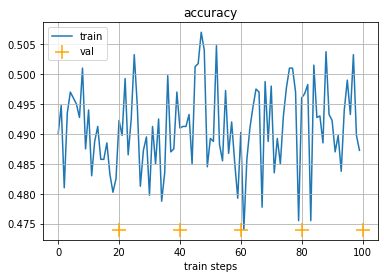

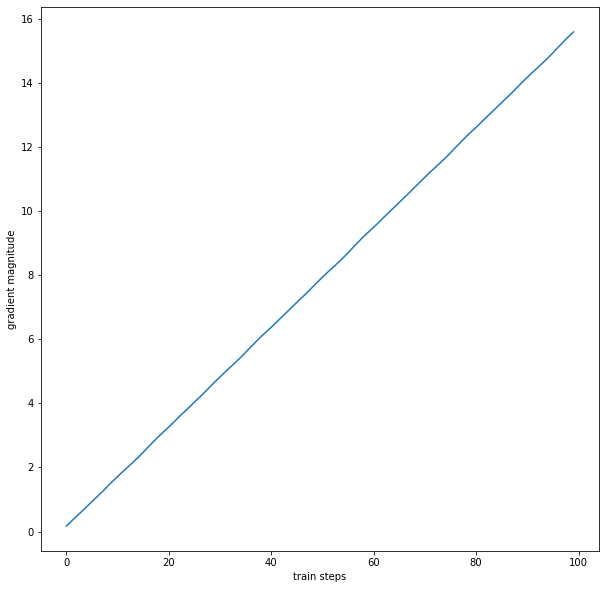


 Confusion matrix 


           0.00000  1.00000
0.00000     5028     5007
1.00000     5514     4451

 actual are rows, predicted are cols
Epoch: 4, val loss: 0.701856529712677, val accuracy: 0.47394999861717224


In [1057]:
train(model_pyt, optimizer, 5)

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'steps')

Text(0, 0.5, 'Gradient Magnitude')

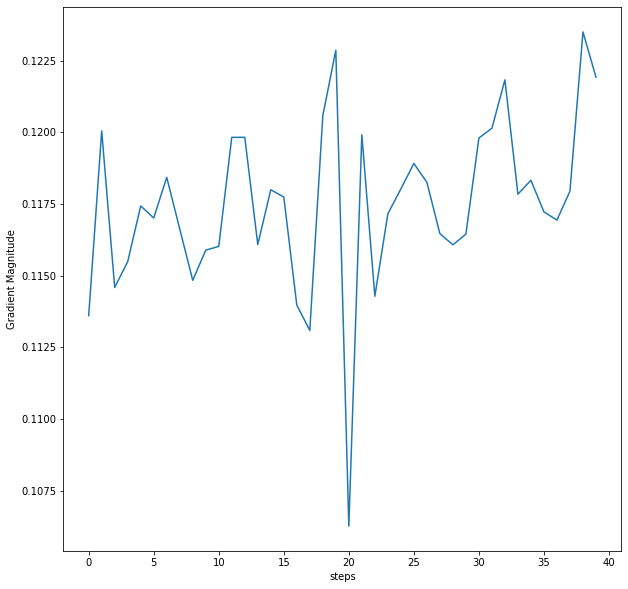

In [908]:
gsteps = [global_weights[x][0] for x in range(len(global_weights))]
gnorms = []
gcomp = []
gorth = []


for y in range(len(global_weights)):
    for x in range(len(global_weights[y][1])):
        gcomp.extend(global_weights[y][1][x])
    gcomp = np.array(gcomp)
    gorth.append((gcomp))
    gnorms.append(np.linalg.norm(gcomp))
    gcomp = []

gnorms
gsteps

clear_output()
plt.figure(figsize=(10,10))
plt.plot(gsteps,gnorms)
plt.xlabel("steps")
plt.ylabel("Gradient Magnitude")

PCA(n_components=2)

(83625, 2)

<Figure size 720x720 with 0 Axes>

Text(-0.0011069908149642551, 0.002004357163888928, "(21, 'one')")

Text(-0.47510305799148006, -0.2912986650467082, "(19, 'want')")

Text(-0.15206706464646647, -0.845411638333469, "(4, 'day')")

Text(0.3103830454932403, 1.5845404979972633, "(32, 'night')")

Text(0.12021110116883323, -2.1968737132237512, "(1, 'i')")

Text(-0.7708486158557555, 1.577567095523818, "(2, 'am')")

Text(-1.5389165349725498, -1.15618217355999, "(35, 'watch')")

Text(-0.6315399183035767, 0.5133232281635245, "(34, 'still')")

Text(-0.40913672872516116, 0.1992958267870231, "(20, 'back')")

Text(-0.515533909644721, -0.8021792654634784, "(6, 'work')")

Text(-0.9382191198258198, -0.29646341086827077, "(40, 'home')")

Text(0.44694102454597334, 0.0792267856743114, "(15, 'lol')")

Text(-0.3495388587402789, 0.7904572129855968, "(28, 'see')")

Text(-1.8737637894224404, -0.4538516687842698, "(45, 'much')")

Text(1.6764630214092981, -1.2702360849720866, "(9, 'http')")

Text(0.09764161654791281, 0.12709003970669083, "(23, 'com')")

Text(0.6364447289701035, -1.276152775369753, "(17, 'miss')")

Text(1.010602557641671, -1.7891164659183745, "(50, 'you')")

Text(1.1242981979719266, 1.3307667443292304, "(26, 'think')")

Text(0.36517638015886256, 0.01725353215558224, "(36, 'need')")

Text(1.5657593659070965, -0.5019436733443746, "(14, 'got')")

Text(-0.5225283452467648, -0.8669408543949801, "(16, 'not')")

Text(-1.3220775279781463, -2.1446454712517014, "(3, 'get')")

Text(-1.9442896709047262, 0.5979034579536696, "(39, 'new')")

Text(-0.7563383381015726, -0.5599599338374565, "(12, 'today')")

Text(-0.017396248018064425, 1.8357529387494527, "(10, 'go')")

Text(-1.124504776961797, -0.9505364178119344, "(46, 'twitter')")

Text(1.4807911664772844, -0.9972741177068869, "(13, 'time')")

Text(-0.9939912710274957, -1.6244217605552664, "(27, 'realli')")

Text(0.6717651819239789, 0.5525794177731843, "(38, 'make')")

Text(-0.7221477740798632, 1.4990329325502387, "(22, 'know')")

Text(1.9362372551515645, 0.25425994572446703, "(48, 'morn')")

Text(-1.0974351891041974, 0.8707973324128626, "(33, 'hope')")

Text(-0.5937973238474998, -1.511700511077886, "(30, 'ca')")

Text(-1.893594800240967, 2.0074232742923073, "(25, 'feel')")

Text(0.10046995570279289, 0.9509523754843908, "(43, 'come')")

Text(1.6701957657592446, -2.3209725095582714, "(5, 'good')")

Text(-0.1877098892927594, 0.5614392913581628, "(42, 'will')")

Text(0.055186228892118626, -1.1751413986051844, "(47, 'me')")

Text(-1.0232348190440514, -1.9580048736263824, "(49, 'last')")

Text(-3.1237327970844544, -0.5093645214726078, "(31, 'that')")

Text(0.4067526057733501, 0.18219349734465592, "(41, 'would')")

Text(0.9988112090716799, 1.6146122548042086, "(24, 'it')")

Text(1.2416186284650008, 1.4125601872386817, "(8, 'love')")

Text(-2.174923720232743, -0.22919214736054735, "(37, 'well')")

Text(0.3396977911199013, -0.7228232825017181, "(7, 'like')")

Text(1.132737332779695, -1.0983414780016565, "(11, 'quot')")

Text(0.05604672322429462, -1.174065966692227, "(29, 'amp')")

Text(-0.04054211288048747, 0.014939157168633584, "(44, 'look')")

Text(1.6462815333877934, -1.0209207021856352, "(18, 'thank')")

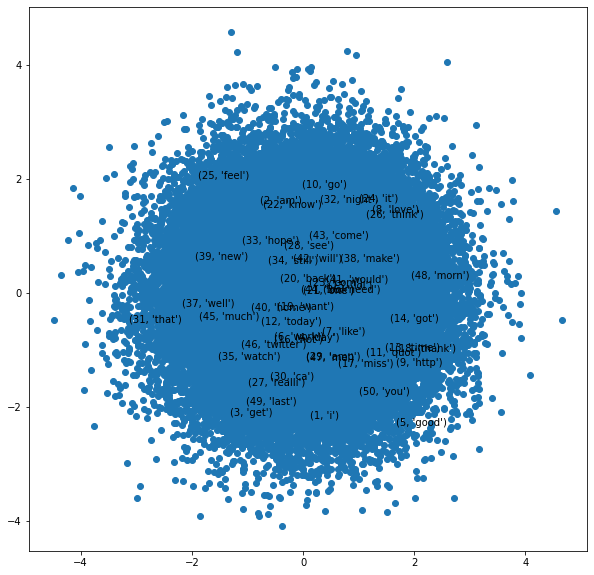

In [594]:
weights = model_pyt.embedding.weight.data

pca = decomposition.PCA(n_components=2)

pca.fit(weights)

X = pca.transform(weights)

X.shape

result = X

pyplot.figure(figsize=(10,10))
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))



pyplot.show()